In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_costs.csv', DATA))
head(data)

lon       lat      etopo1   beetleAcres host forest mStdAge   density 
1 -124.2945 42.21193 387.5008 2.10        1    1      102.39621 51167.16
2 -123.8987 40.71212 554.1549 0.80        0    1       55.00000 48183.45
3 -123.9778 41.15724 462.4003 0.46        1    1       24.51245 51675.95
4 -124.0749 41.69113 310.1873 0.70        1    1       64.69794 58227.45
5 -123.6292 39.83341 636.2545 0.70        1    1       78.60288 47511.05
6 -123.8913 41.34770 354.7943 0.46        1    0       84.20680 52603.24
  PctLarge  PctOld     ⋯ minT      JanMin     TOctSep   Jan20 PcumOctSep
1 0.1931126 0.00000000 ⋯ -1.701227  0.2686584 10.650637 0     3508.975  
2 0.3004344 0.11428571 ⋯ -3.631704 -1.6740057  9.548764 0     3029.574  
3 0.2191781 0.06666667 ⋯ -3.165836 -1.3108726 10.921748 0     2914.449  
4 0.2395833 0.07954546 ⋯ -2.734460 -0.7594389 11.435045 0     3241.801  
5 0.3593750 0.50000000 ⋯ -4.173242 -2.0681493 10.979370 0     2751.259  
6 0.1860465 0.01282051 ⋯ -3.712275 -1.7491565 11.032777 0     2947.334  
  SprsFires PctSprs   SprsAcre    SprsDays OutDays
1 2         1.0000000    0.200000  0.0      3.5   
2 1         1.0000000   14.400000  0.0     11.0   
3 7         0.8750000    8.257143  3.0      6.0   
4 1         0.3333333    0.100000  0.0      1.0   
5 1         1.0000000 3597.000000 34.0     72.0   
6 6         1.0000000    1.433333  0.5      1.0

In [49]:
cor.test(data$SprsFires, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$SprsFires and log(data$beetleAcres)
t = -4.9755, df = 2816, p-value = 6.898e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.12982867 -0.05662291
sample estimates:
        cor 
-0.09335196 


In [50]:
cor.test(data$PctSprs, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$PctSprs and log(data$beetleAcres)
t = -11.581, df = 2816, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2481931 -0.1776977
sample estimates:
       cor 
-0.2132229 


In [51]:
cor.test(data$SprsAcre, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$SprsAcre and log(data$beetleAcres)
t = -0.40356, df = 2816, p-value = 0.6866
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04451635  0.02932784
sample estimates:
         cor 
-0.007604625 


In [52]:
cor.test(data$SprsDays, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$SprsDays and log(data$beetleAcres)
t = 4.067, df = 2816, p-value = 4.893e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03960371 0.11302151
sample estimates:
       cor 
0.07641619 


In [53]:
cor.test(data$OutDays, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$OutDays and log(data$beetleAcres)
t = 0.96202, df = 2816, p-value = 0.3361
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01881099  0.05501323
sample estimates:
       cor 
0.01812583 


In [3]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays),
    data=data) # GCV = 2.2692
proc.time() - ptm

   user  system elapsed 
 30.248   0.618  33.496 

In [4]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + 
    te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + 
    te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + 
    te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + 
    te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + 
    te(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.81562    0.13737  27.775  < 2e-16 ***
host         0.43714    0.12934   3.380 0.0007

In [11]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays),
    data=data) # GCV = 2.2692
proc.time() - ptm

   user  system elapsed 
 28.860   0.606  31.826 

In [12]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + 
    te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + 
    te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + 
    te(Jan20) + te(PcumOctSep) + te(SprsFires) + te(PctSprs) + 
    te(SprsAcre) + te(SprsDays) + te(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.81308    0.13690  27.853  < 2e-16 ***
host         0.43932    0.12894   3.407 0.000666 ***
forest       0.15733    0.06

In [13]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep', 'SprsFires', 'PctSprs', 'SprsAcre', 
  'SprsDays', 'OutDays')

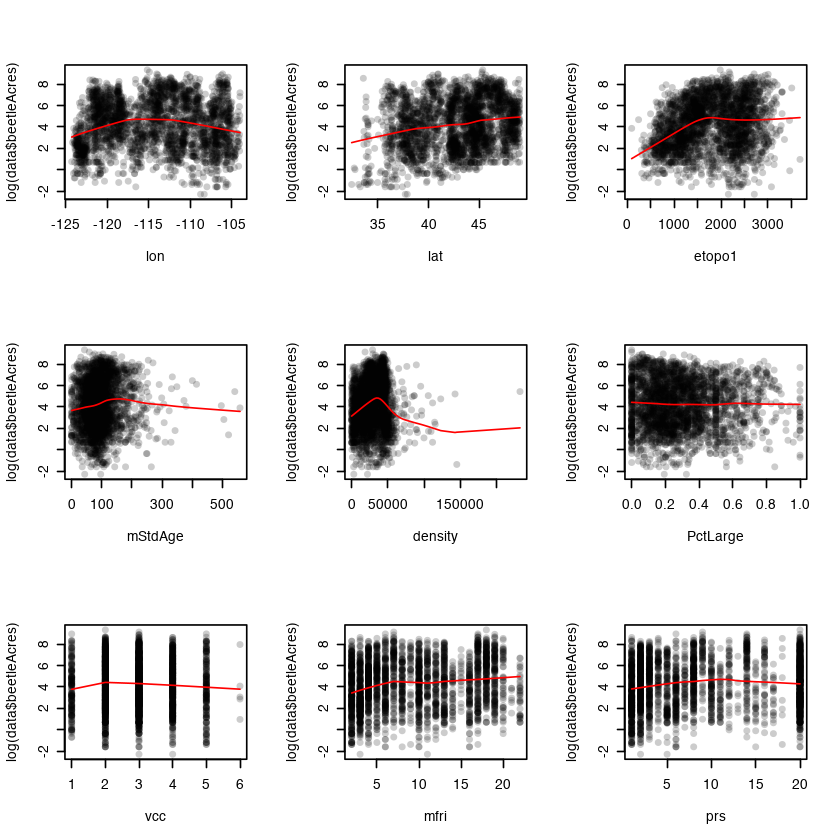

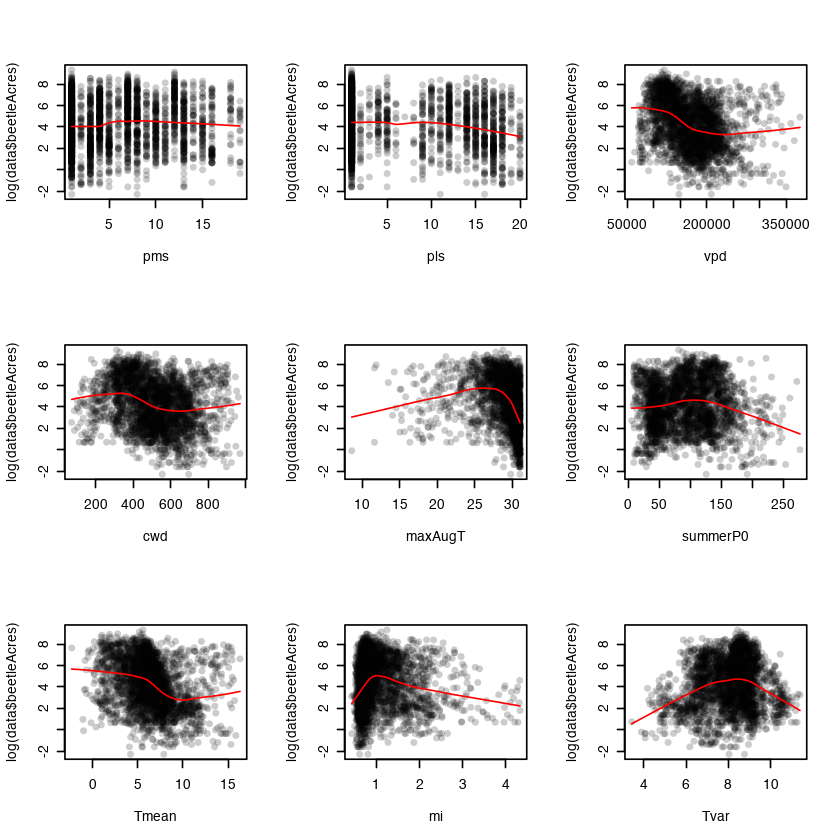

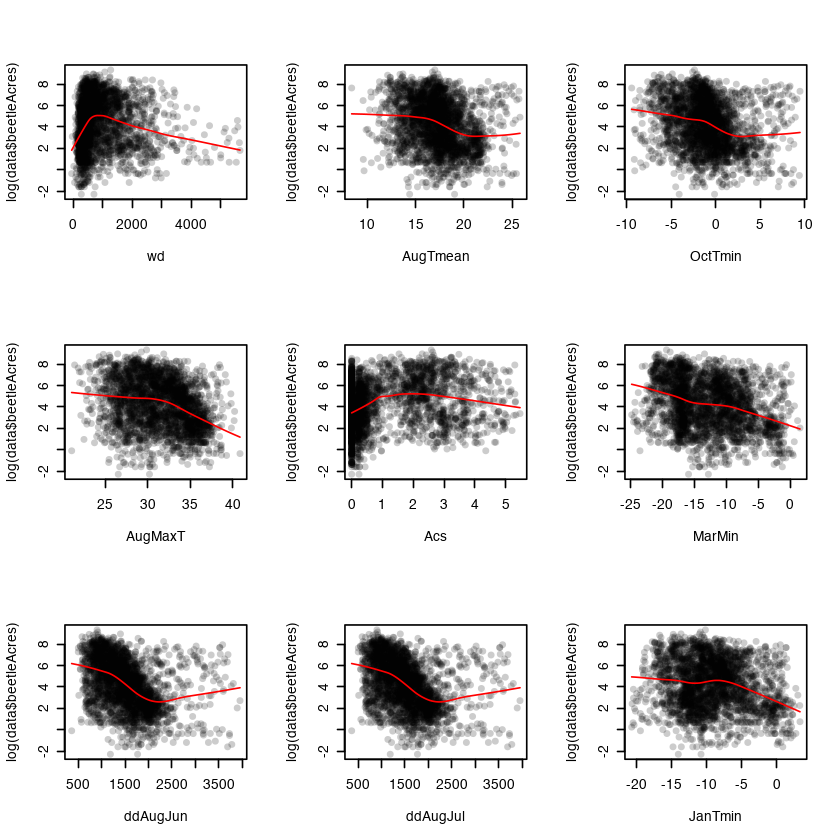

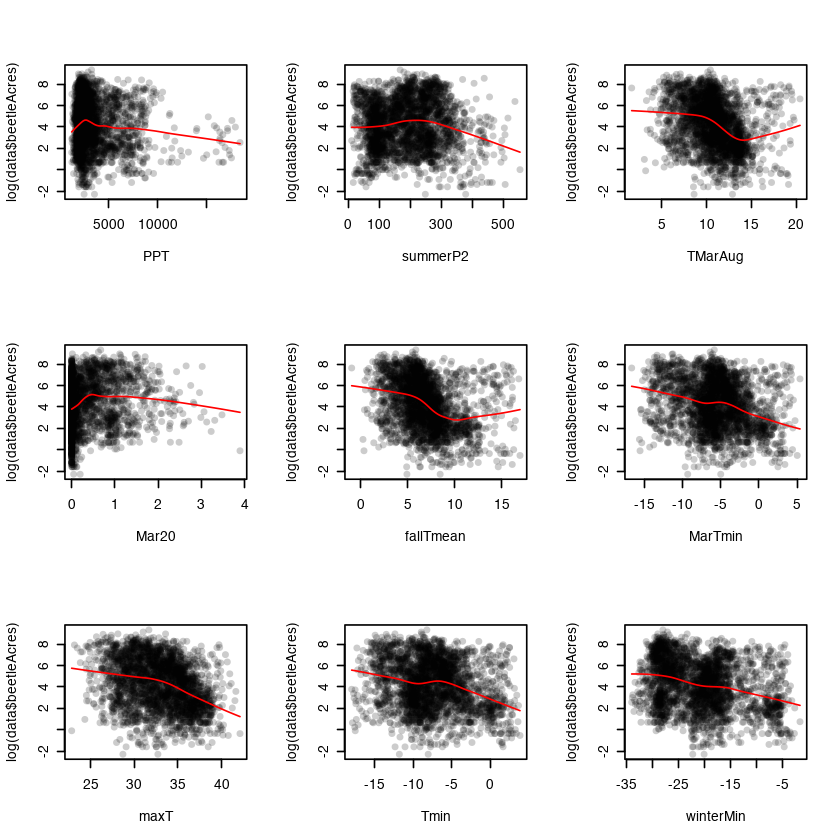

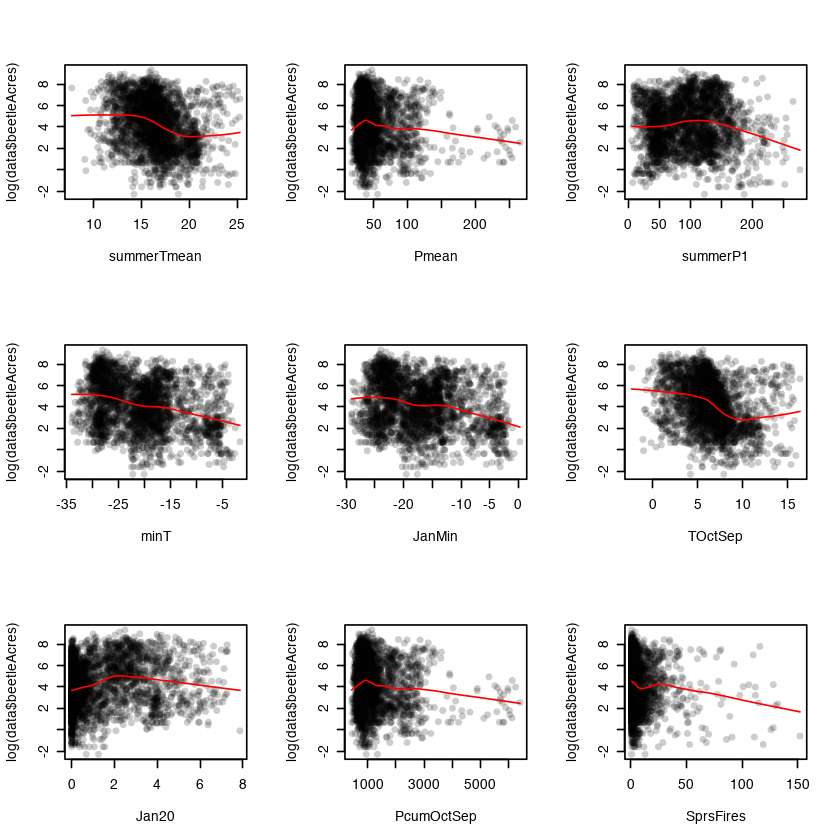

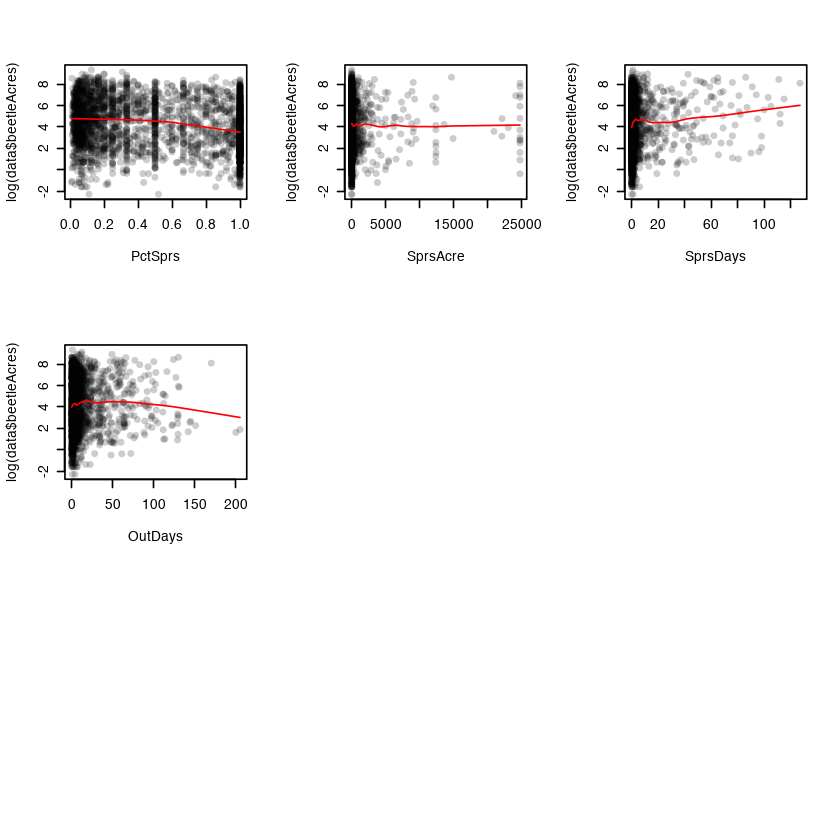

In [14]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [3]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 1000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
 88.283   2.159  98.709 

In [4]:
bstar <- as.data.frame(bstar)

In [5]:
head(bstar)

(Intercept) lon        I(lon^2)      lat      I(lat^2)    etopo1     
1 -108.61005  -0.3546550 -0.0004936746 3.551543 -0.04442405 0.001655919
2  -20.29158   0.4506483  0.0031530601 1.959851 -0.02579714 0.002332649
3  -12.35359   0.8394548  0.0044988227 2.059886 -0.02337125 0.001853822
4   97.62034   2.4330969  0.0115530505 1.380114 -0.01867128 0.002212441
5  -63.89160  -0.6195451 -0.0019596646 1.443172 -0.01824341 0.002073493
6  -33.77941   0.4121159  0.0025940712 1.435856 -0.01844072 0.001853765
  I(etopo1^2)   mStdAge      I(mStdAge^2)  density      ⋯ exp(TOctSep) 
1 -5.656541e-08 0.0007504187 -1.916039e-06 3.365832e-05 ⋯ -1.439795e-04
2 -1.038398e-07 0.0022086554 -7.522387e-06 3.388139e-05 ⋯ -2.102262e-04
3  6.559442e-08 0.0018369723 -3.495810e-06 4.690466e-05 ⋯ -2.016973e-04
4 -1.529239e-08 0.0021285876 -7.841859e-06 4.028459e-05 ⋯ -1.114944e-04
5 -1.032089e-07 0.0023203918 -9.127297e-06 3.354973e-05 ⋯ -9.306872e-05
6 -8.077884e-08 0.0023404167 -6.419768e-06 3.299051e-05 ⋯ -2.751104e-04
  Jan20      I(Jan20^2) PcumOctSep I(PcumOctSep^2) SprsFires  PctSprs   
1 -0.4105829 0.1147434  -0.2391804 5.195639e-05    0.02181897 -0.6851952
2 -0.4763573 0.1277247  -0.2075076 4.197070e-05    0.02164128 -0.5628618
3 -0.4998329 0.1015438  -0.1761510 3.086175e-05    0.02079424 -0.5561618
4 -0.4888998 0.1316717  -0.1896312 4.035448e-05    0.02700189 -0.7052339
5 -1.5970717 0.2342673  -0.1561093 2.709396e-05    0.01736994 -0.6144992
6 -0.7238310 0.1355782  -0.1875965 4.304522e-05    0.02396193 -0.6839623
  SprsAcre      SprsDays      OutDays    
1 -2.845821e-05 -1.666919e-04 0.001590646
2 -3.755456e-05  2.893963e-03 0.002608829
3 -5.043132e-05 -6.579692e-05 0.004513320
4 -4.049372e-05  7.756272e-03 0.002270612
5 -3.564195e-05 -4.176138e-03 0.004381532
6 -4.718592e-05  2.375109e-03 0.002424489

In [6]:
dim(bstar)
names(bstar)

[1] 1000   90

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "PctLarge"       
[13] "PctOld"          "vcc"             "log(vcc)"        "mfri"           
[17] "log(mfri)"       "prs"             "I(prs^2)"        "pms"            
[21] "pls"             "GAP1"            "GAP2"            "GAP3"           
[25] "vpd"             "I(vpd^2)"        "cwd"             "I(cwd^2)"       
[29] "maxAugT"         "I(maxAugT^2)"    "I(summerP0^2)"   "summerP0"       
[33] "Tmean"           "I(Tmean^2)"      "exp(Tmean)"      "mi"             
[37] "I(mi^2)"         "Tvar"            "I(Tvar^2)"       "wd"             
[41] "I(wd^2)"         "AugTmean"        "I(AugTmean^2)"   "OctTmin"        
[45] "I(OctTmin^2)"    "AugMaxT"         "I(AugMaxT^2)"    "AugTmax"        
[49] "Acs"             "I(Acs^2)"        "MarMin"          "ddAugJun"       
[53] "I(ddAugJun^2)"   "ddAugJul"        "I(ddAugJul^2)"   "JanTmin"        
[57] "PPT"             "I(PPT^2)"        "summerP2"        "I(summerP2^2)"  
[61] "TMarAug"         "exp(TMarAug)"    "Mar20"           "log(Mar20 + 1)" 
[65] "fallTmean"       "exp(fallTmean)"  "MarTmin"         "maxT"           
[69] "I(maxT^2)"       "Tmin"            "winterMin"       "summerTmean"    
[73] "Pmean"           "I(Pmean^2)"      "summerP1"        "I(summerP1^2)"  
[77] "minT"            "JanMin"          "I(JanMin^2)"     "TOctSep"        
[81] "exp(TOctSep)"    "Jan20"           "I(Jan20^2)"      "PcumOctSep"     
[85] "I(PcumOctSep^2)" "SprsFires"       "PctSprs"         "SprsAcre"       
[89] "SprsDays"        "OutDays"

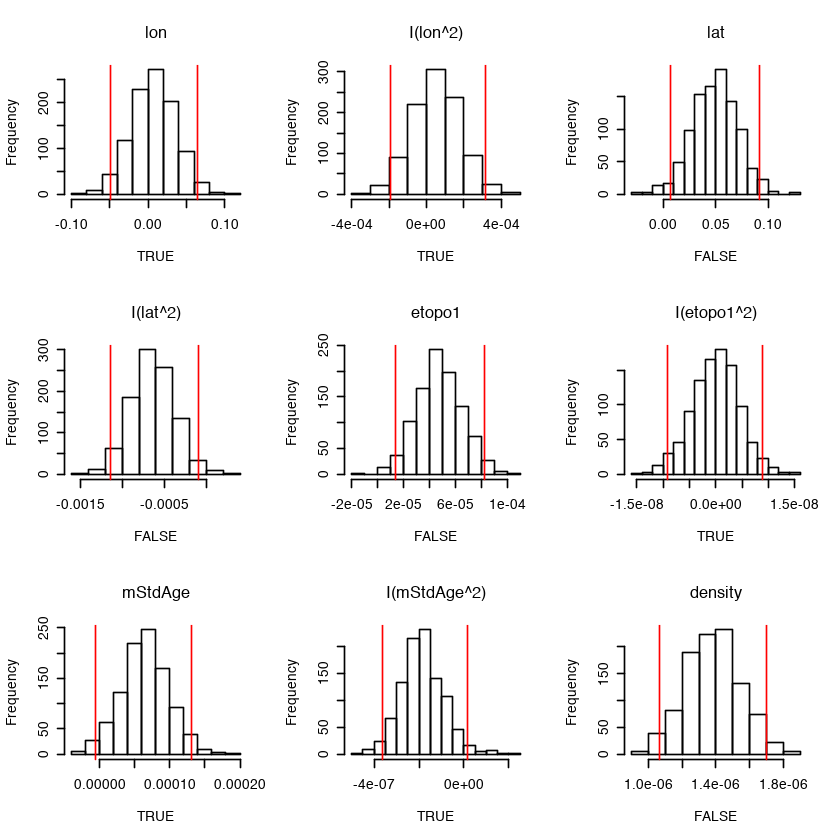

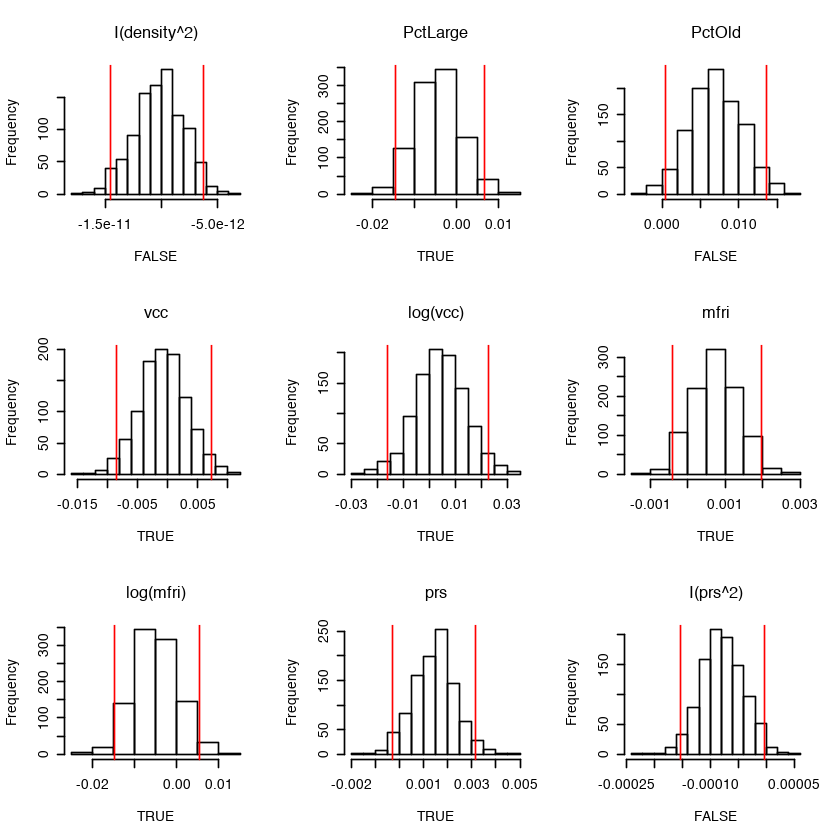

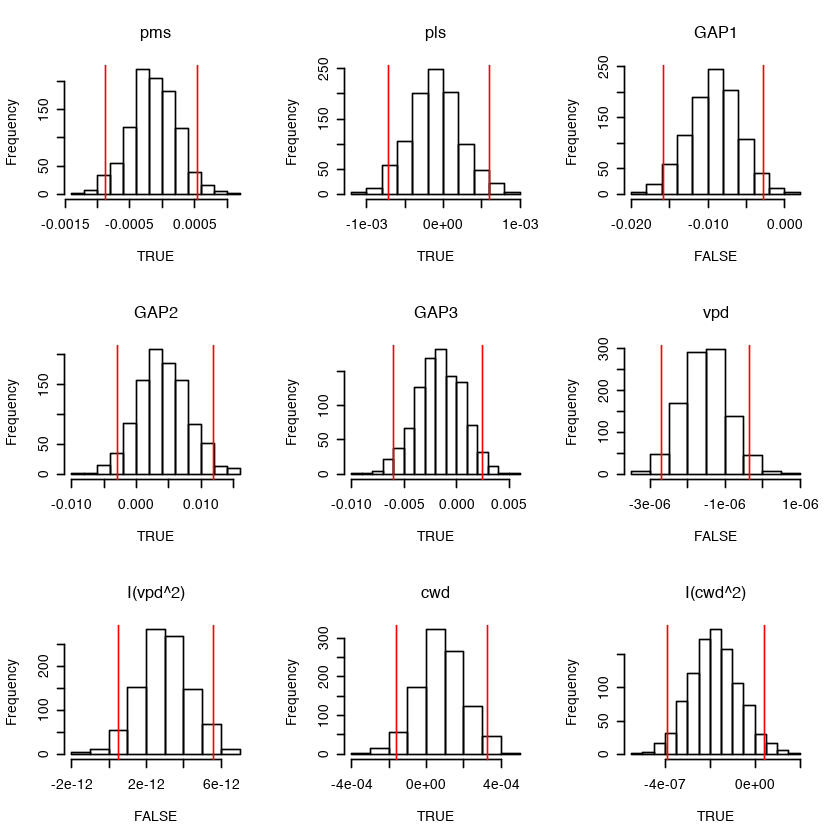

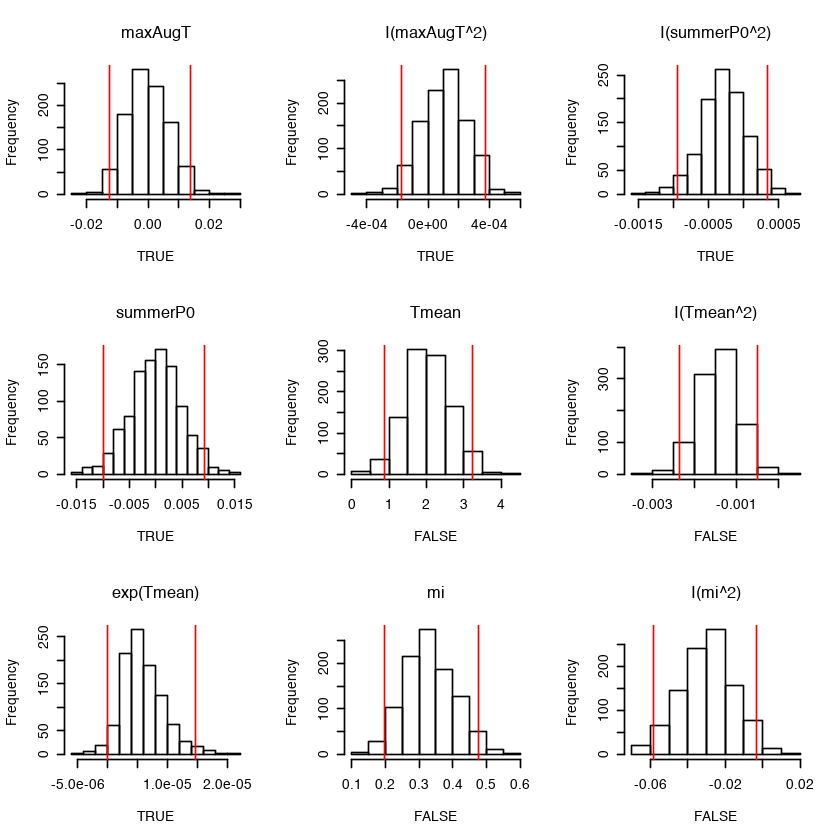

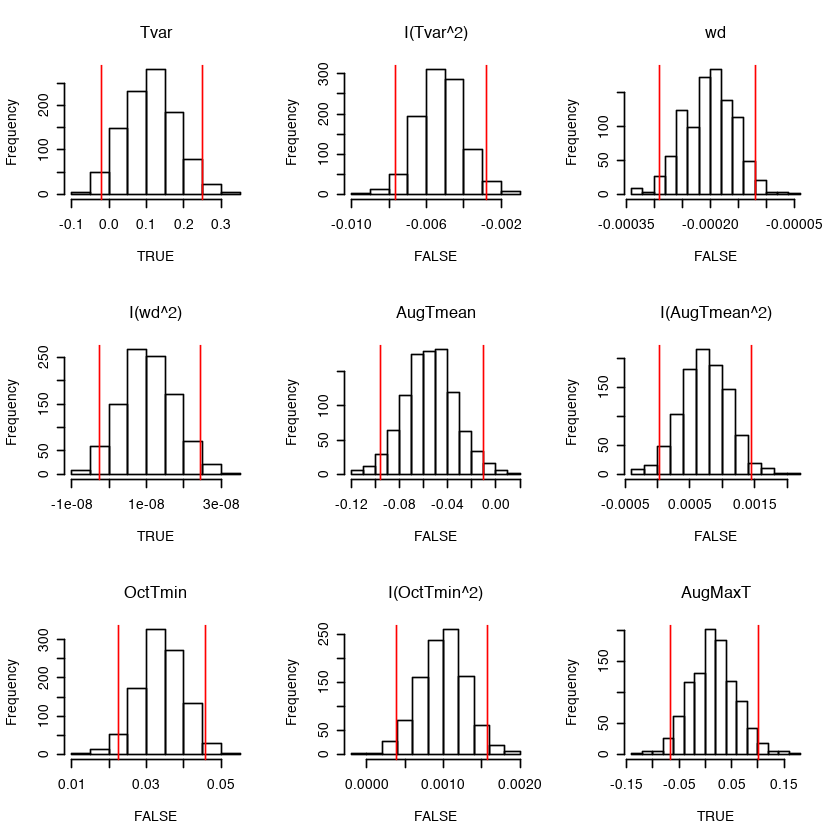

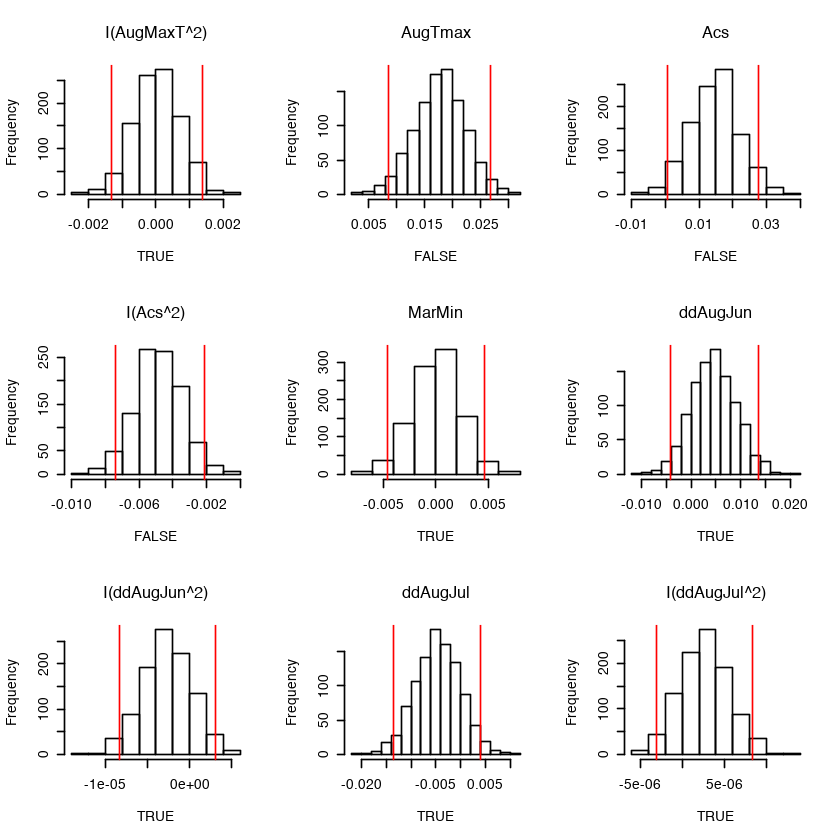

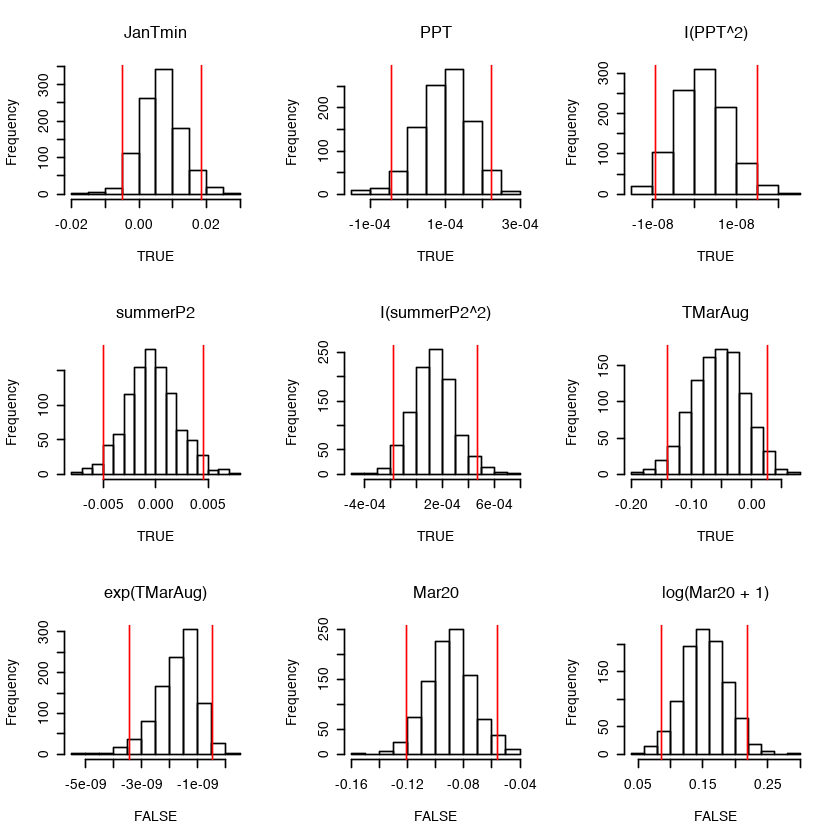

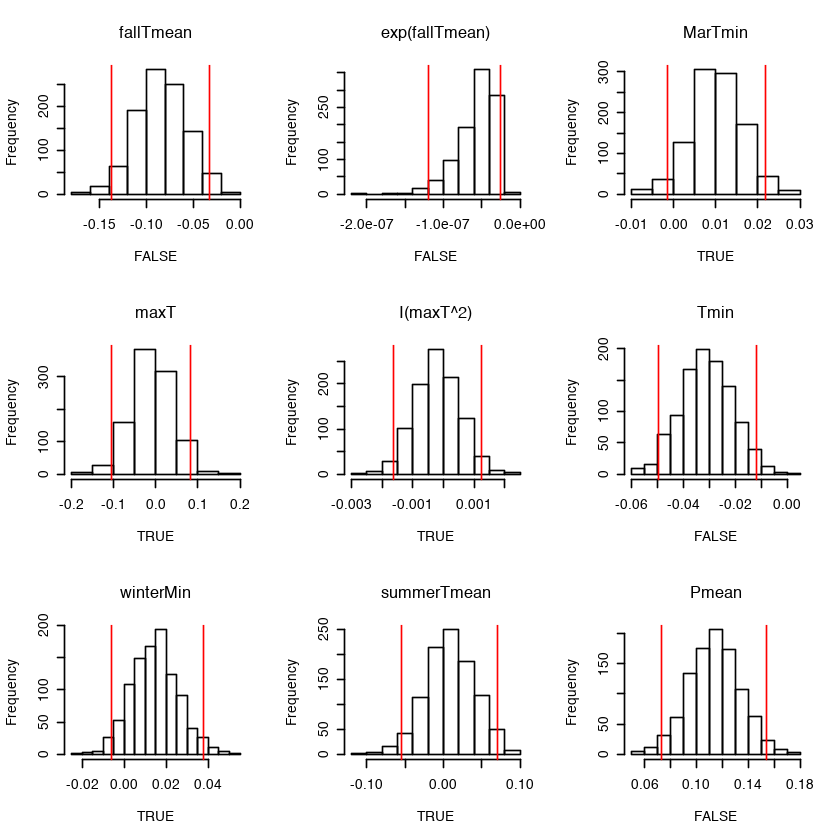

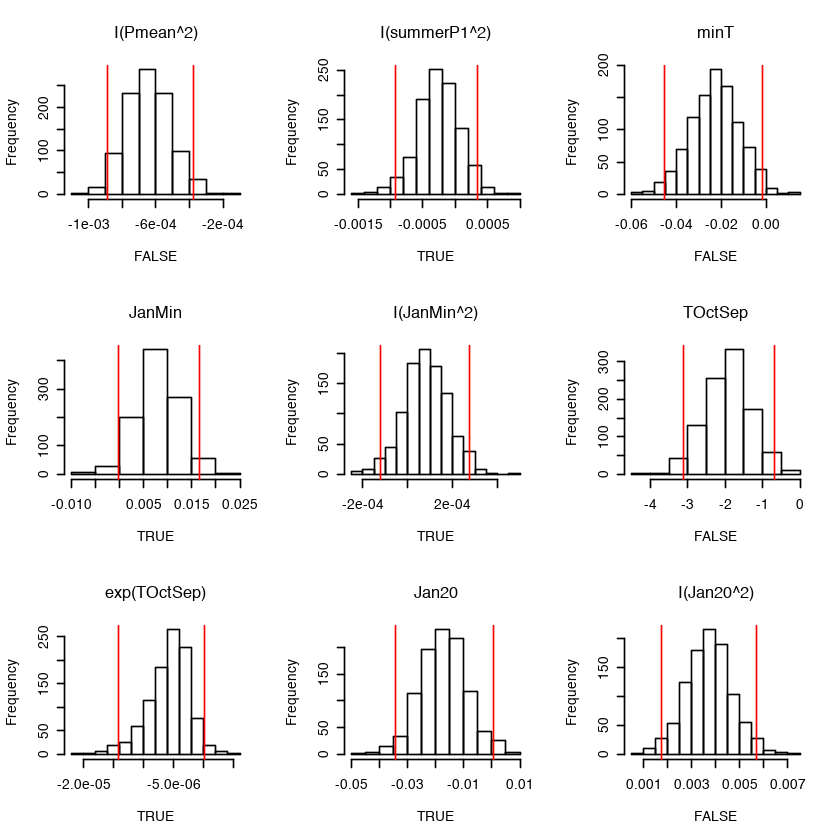

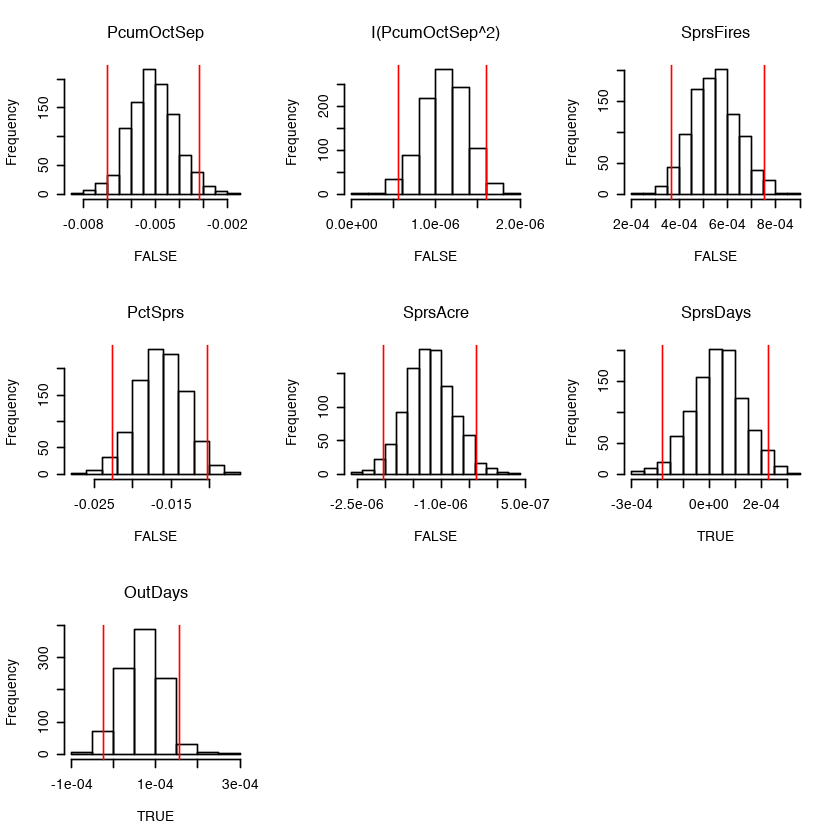

In [47]:
par(mfrow=c(3, 3))
removable <- c()
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        remove <- 0 >= qs[1] & 0 <= qs[2]
        hist(bstar[,field], main=field, xlab=remove)
        abline(v=qs[1],col="red")
        abline(v=qs[2],col="red")
        if(remove){removable <- c(removable, field)}
    }
}

In [48]:
removable

[1] "lon"           "I(lon^2)"      "I(etopo1^2)"   "mStdAge"      
 [5] "I(mStdAge^2)"  "PctLarge"      "vcc"           "log(vcc)"     
 [9] "mfri"          "log(mfri)"     "prs"           "pms"          
[13] "pls"           "GAP2"          "GAP3"          "cwd"          
[17] "I(cwd^2)"      "maxAugT"       "I(maxAugT^2)"  "I(summerP0^2)"
[21] "summerP0"      "exp(Tmean)"    "Tvar"          "I(wd^2)"      
[25] "AugMaxT"       "I(AugMaxT^2)"  "MarMin"        "ddAugJun"     
[29] "I(ddAugJun^2)" "ddAugJul"      "I(ddAugJul^2)" "JanTmin"      
[33] "PPT"           "I(PPT^2)"      "summerP2"      "I(summerP2^2)"
[37] "TMarAug"       "MarTmin"       "maxT"          "I(maxT^2)"    
[41] "winterMin"     "summerTmean"   "I(summerP1^2)" "JanMin"       
[45] "I(JanMin^2)"   "exp(TOctSep)"  "Jan20"         "SprsDays"     
[49] "OutDays"

In [8]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=data)

In [9]:
mod.r <- step(mod, trace=0)

In [10]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ I(lon^2) + lat + I(lat^2) + etopo1 + 
    mStdAge + I(mStdAge^2) + density + I(density^2) + PctOld + 
    prs + I(prs^2) + GAP1 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + 
    Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + I(AugTmean^2) + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + I(Acs^2) + 
    I(ddAugJul^2) + PPT + summerP2 + I(summerP2^2) + TMarAug + 
    exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + 
    MarTmin + I(maxT^2) + Tmin + Pmean + I(Pmean^2) + minT + 
    JanMin + TOctSep + exp(TOctSep) + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2) + SprsFires + PctSprs + SprsAcre + OutDays, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5235 -0.9997  0.1086  1.1022  8.1463 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.123e+01  1.054e+01  -5.811 6.94e-09 ***
I(lon^2)   

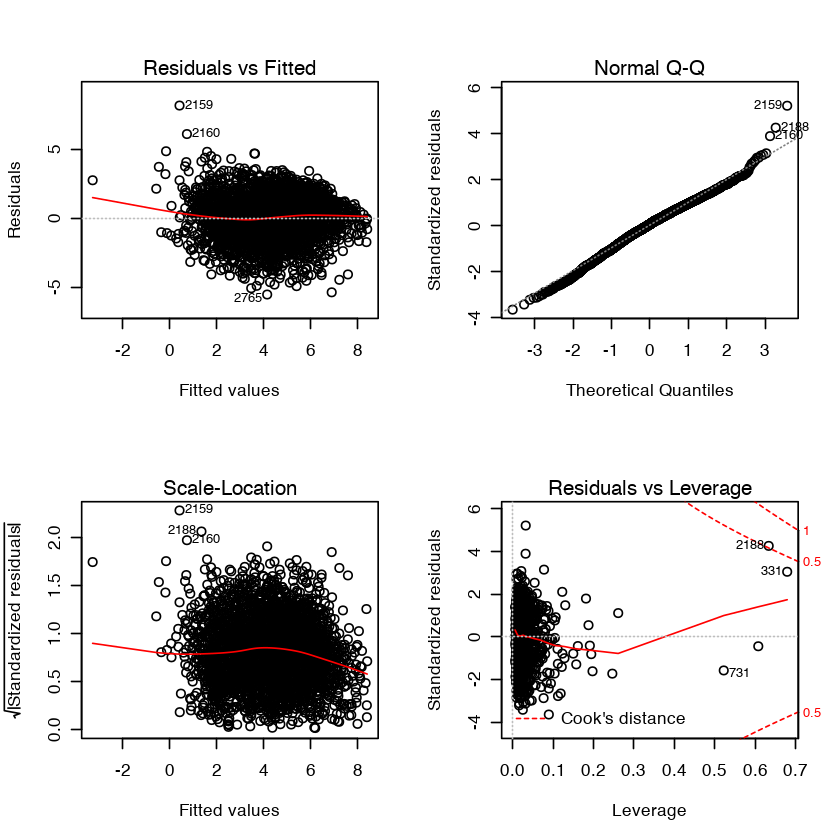

In [11]:
par(mfrow=c(2, 2))
plot(mod.r)

In [12]:
data[2188, ]

lon       lat      etopo1   beetleAcres host forest mStdAge density 
2188 -108.4801 47.99143 1141.424 230.2056    1    1      51      232346.7
     PctLarge   PctOld    ⋯ minT      JanMin    TOctSep  Jan20    PcumOctSep
2188 0.08679834 0.2384615 ⋯ -29.75507 -26.47876 5.810339 5.996357 765.0241  
     SprsFires PctSprs   SprsAcre  SprsDays OutDays
2188 11        0.9166667 0.4636364 0        1

In [13]:
mod2 <- update(mod, . ~ ., data=data[-2188, ])
mod2.r <- step(mod2, trace=0)

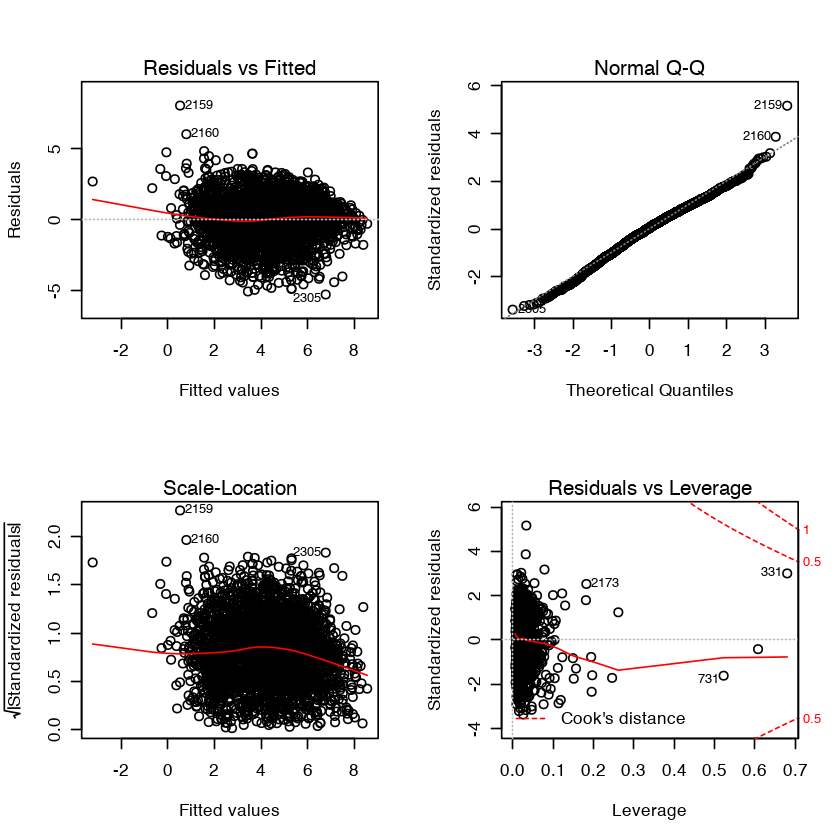

In [14]:
par(mfrow=c(2, 2))
plot(mod2.r)

In [15]:
data <- data[-2188, ]

In [16]:
data$preds <- mod2.r$fitted

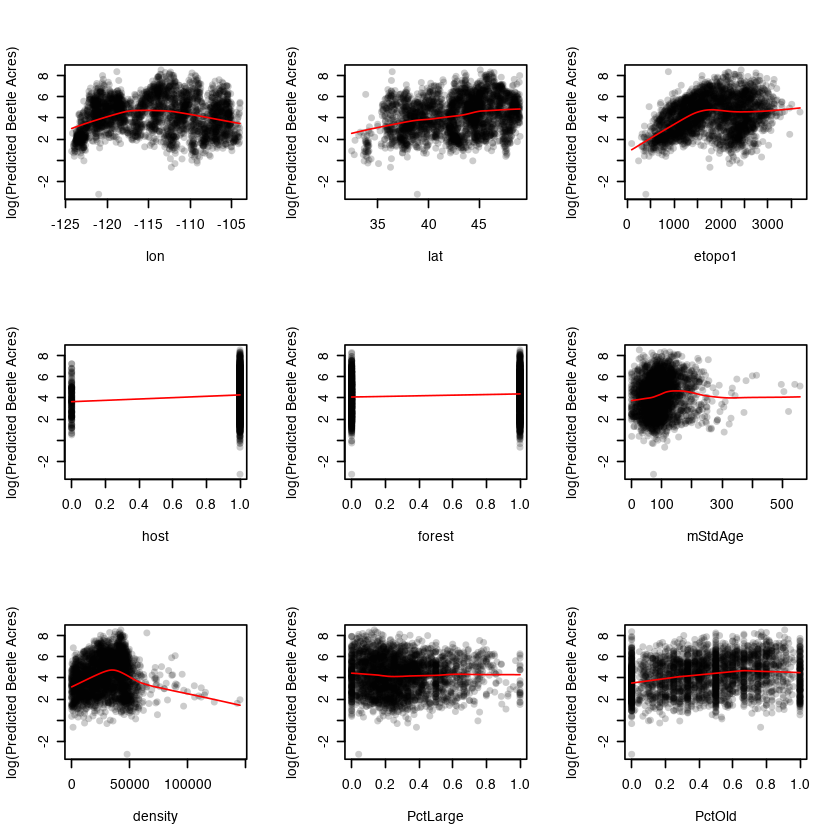

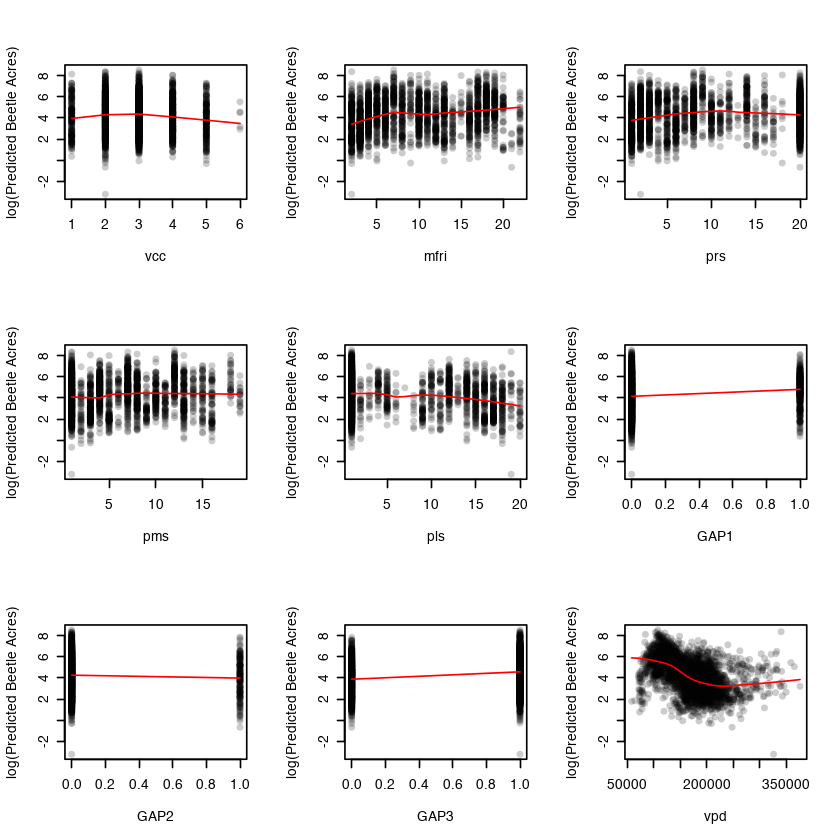

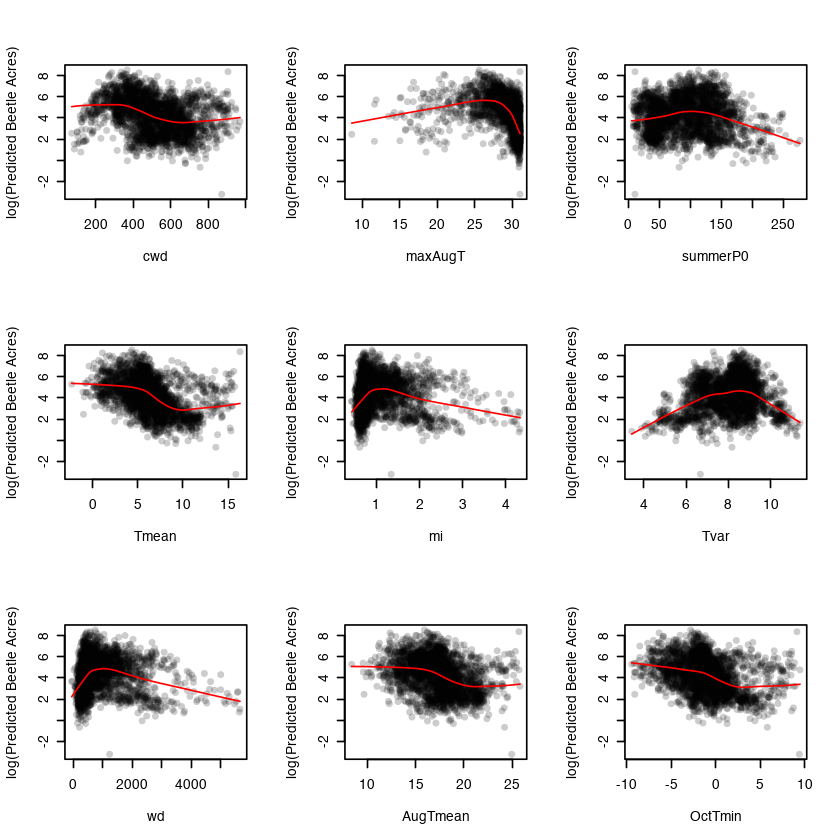

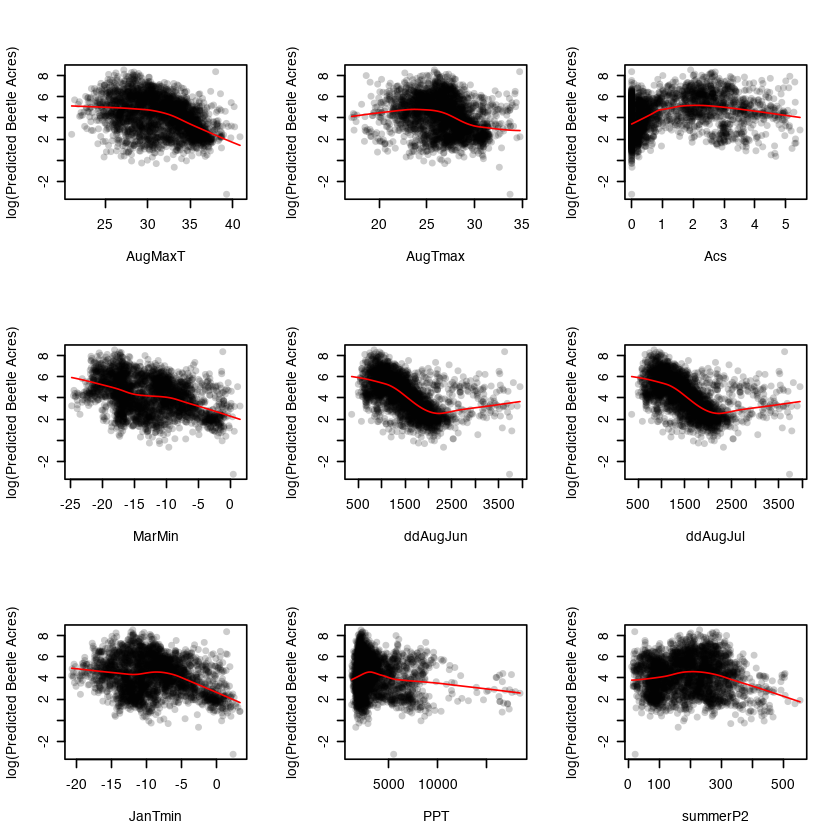

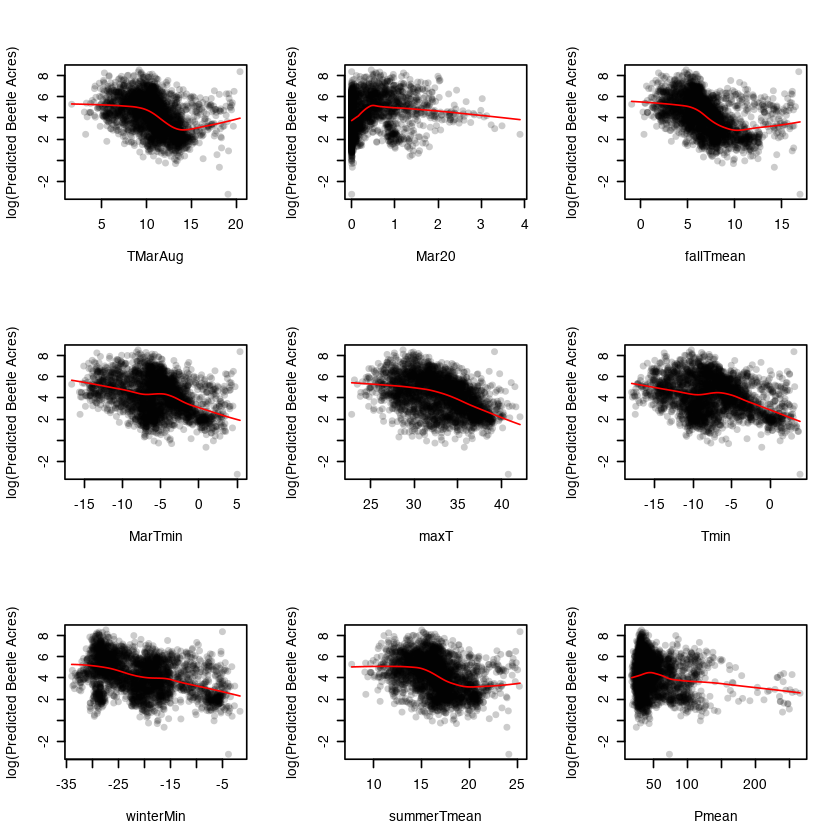

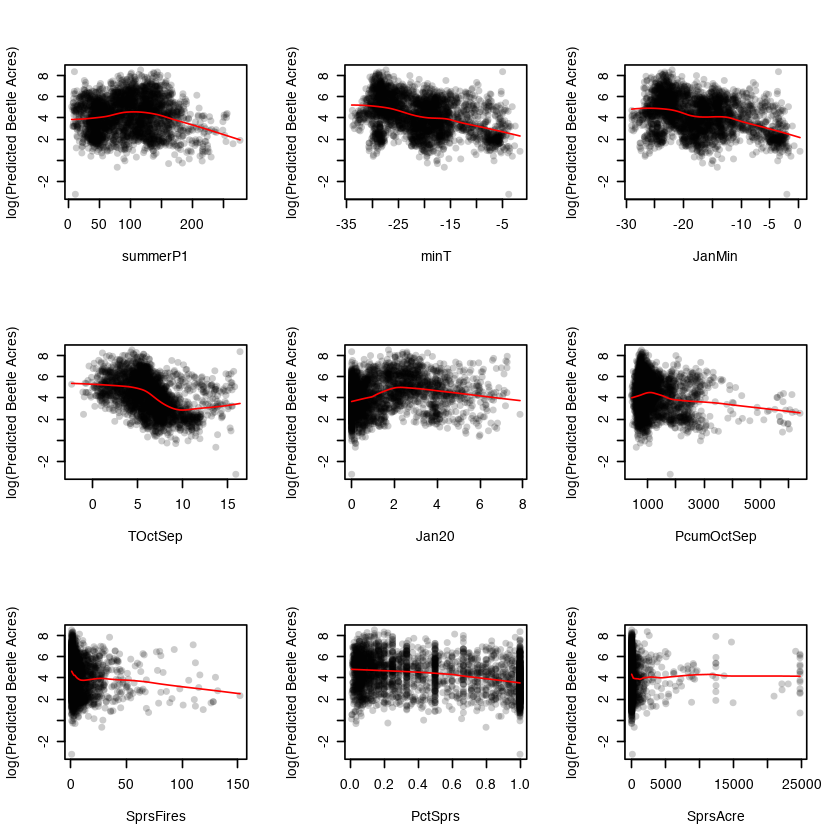

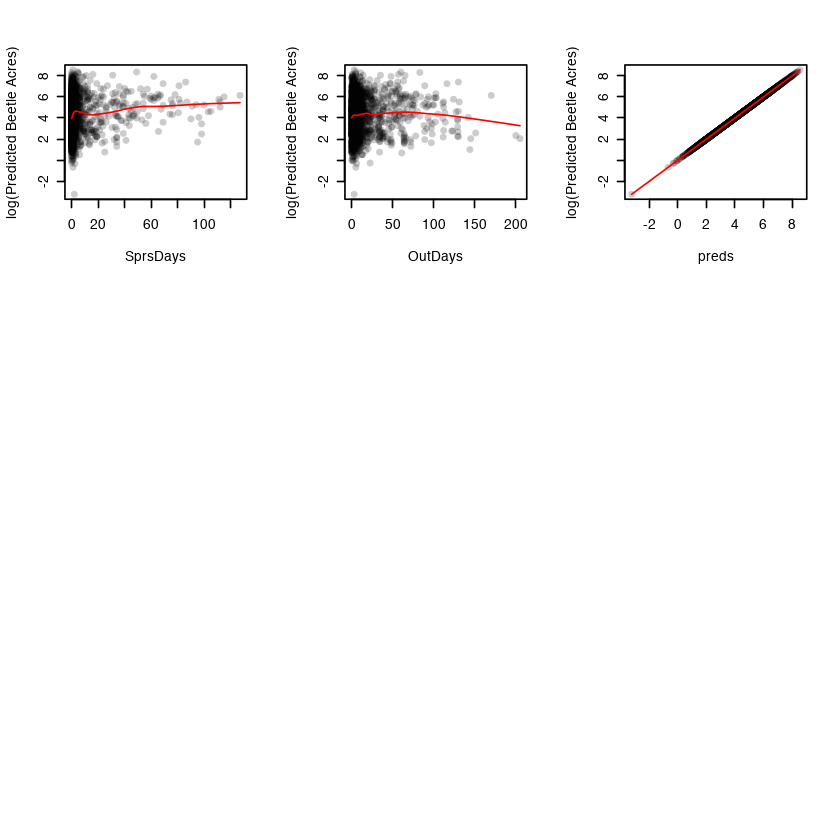

In [17]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (field != 'beetleAcres') {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [18]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

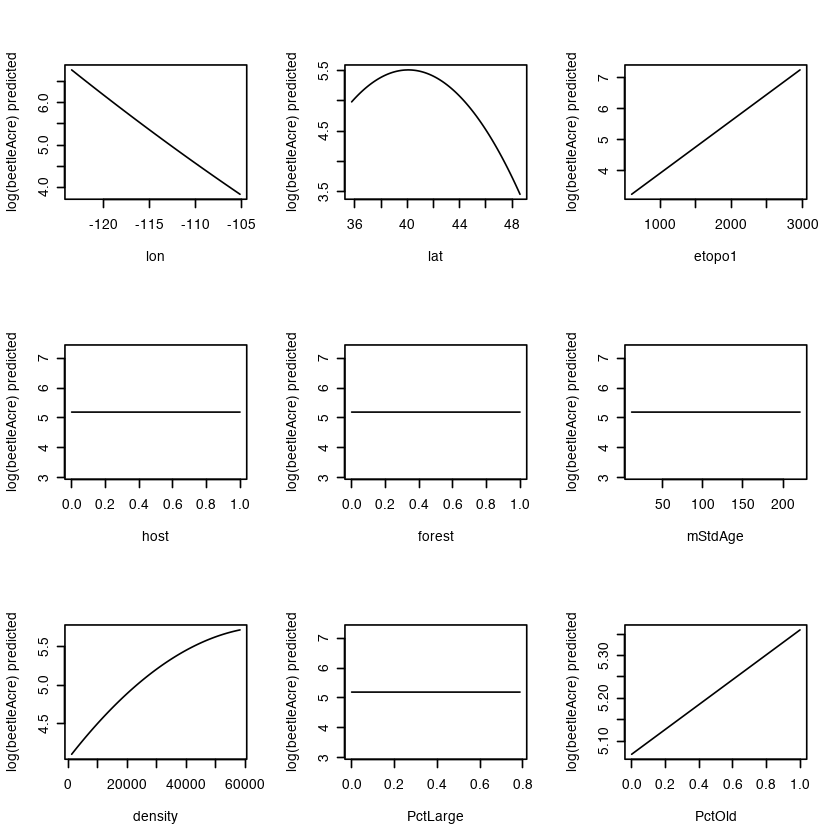

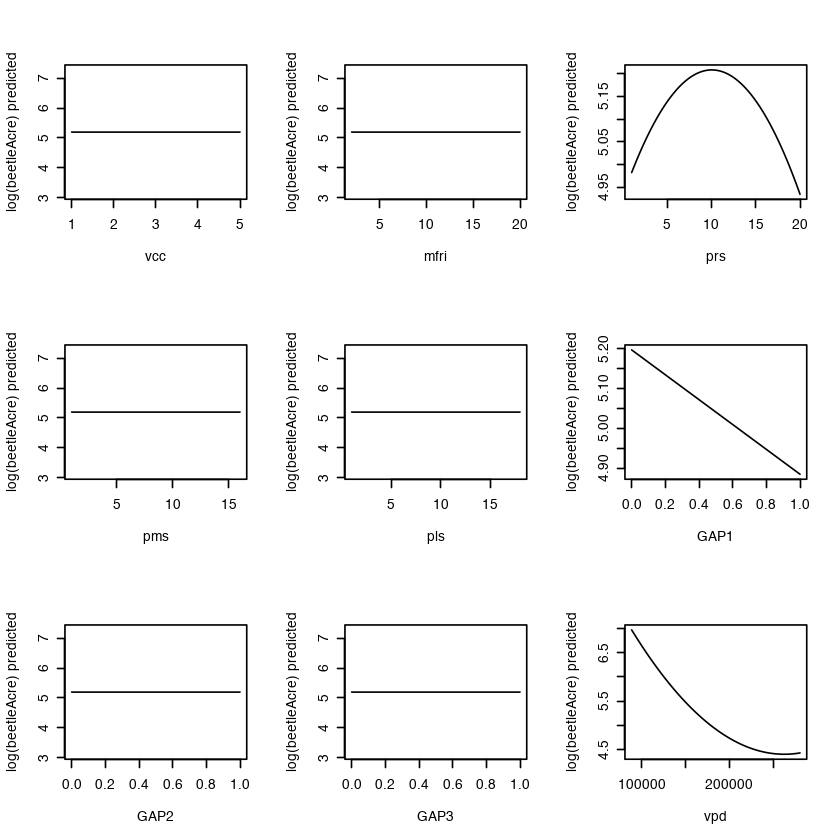

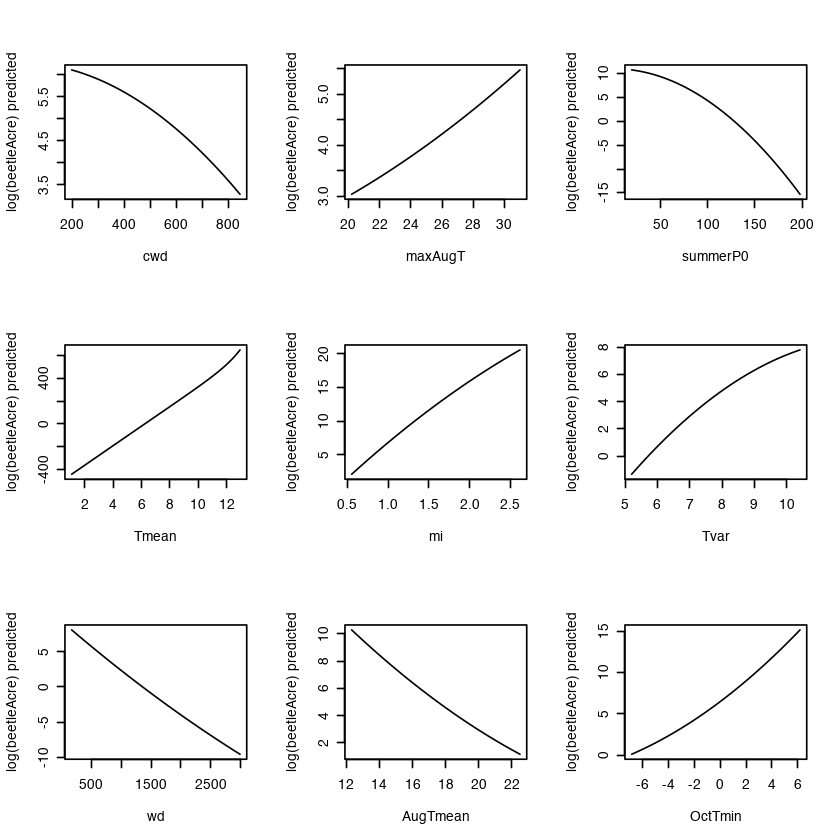

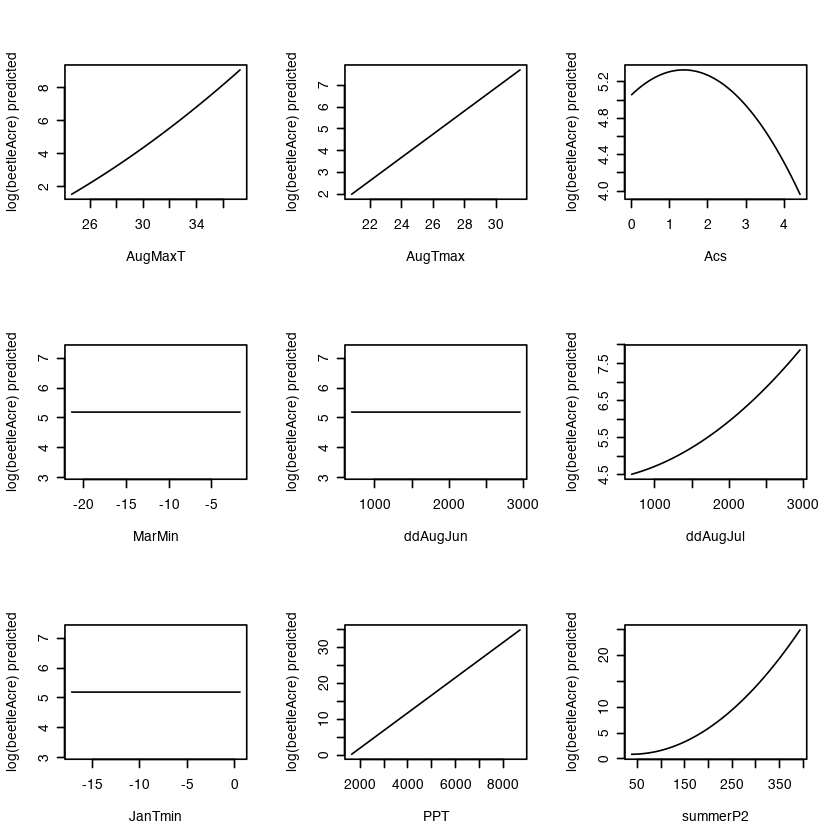

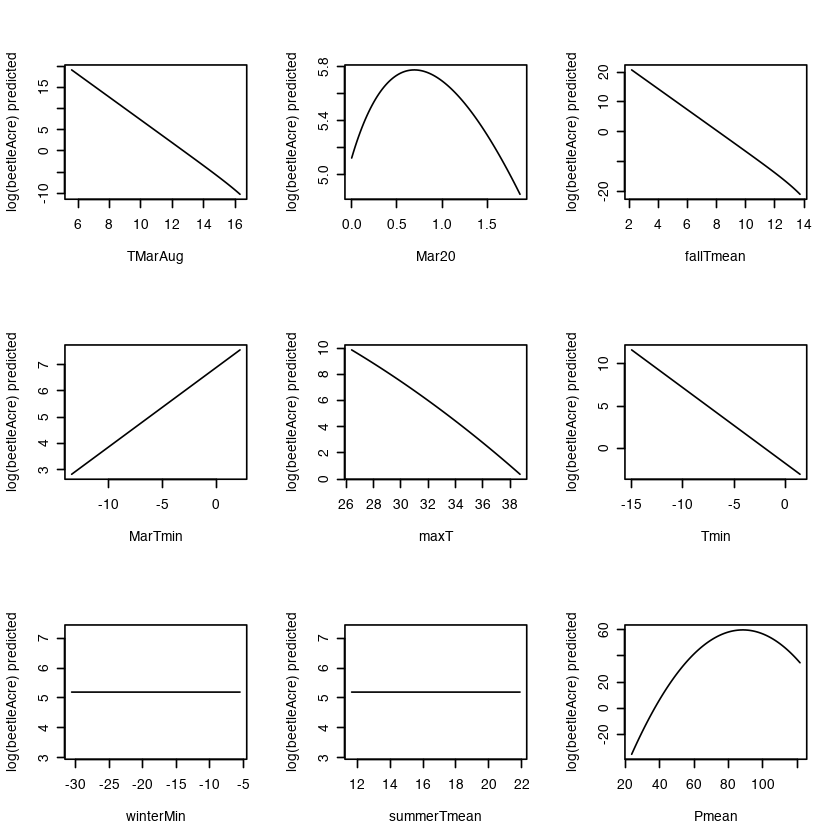

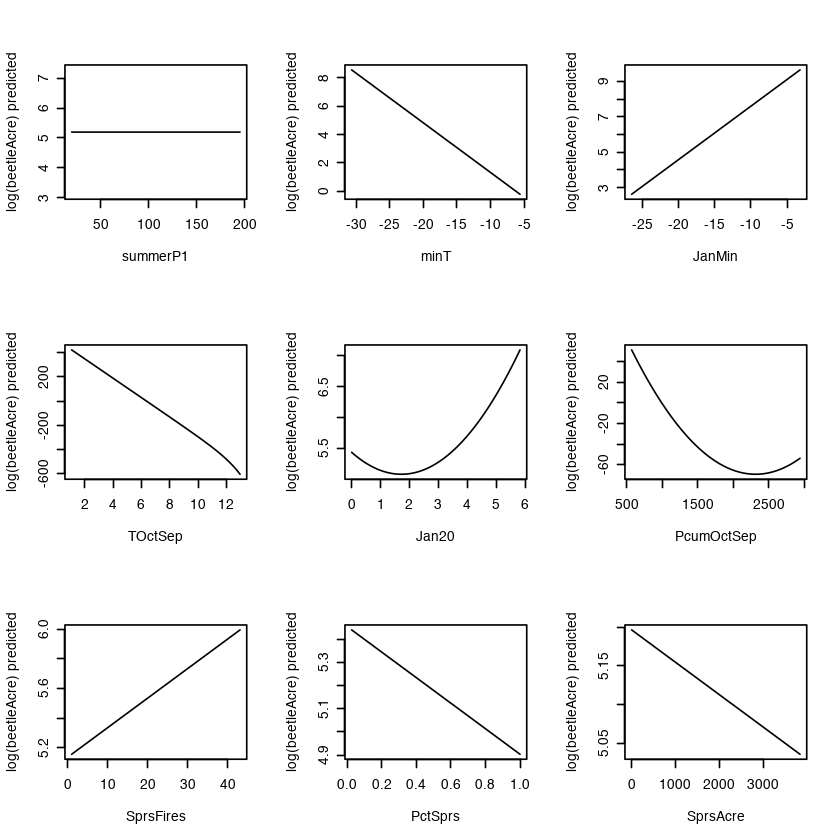

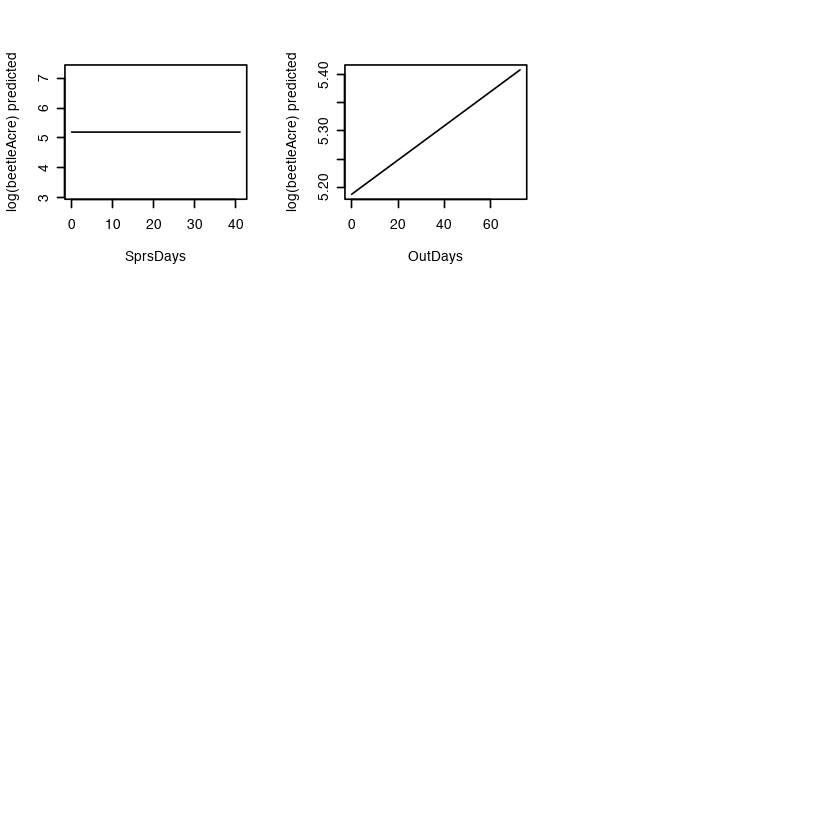

In [19]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod2.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

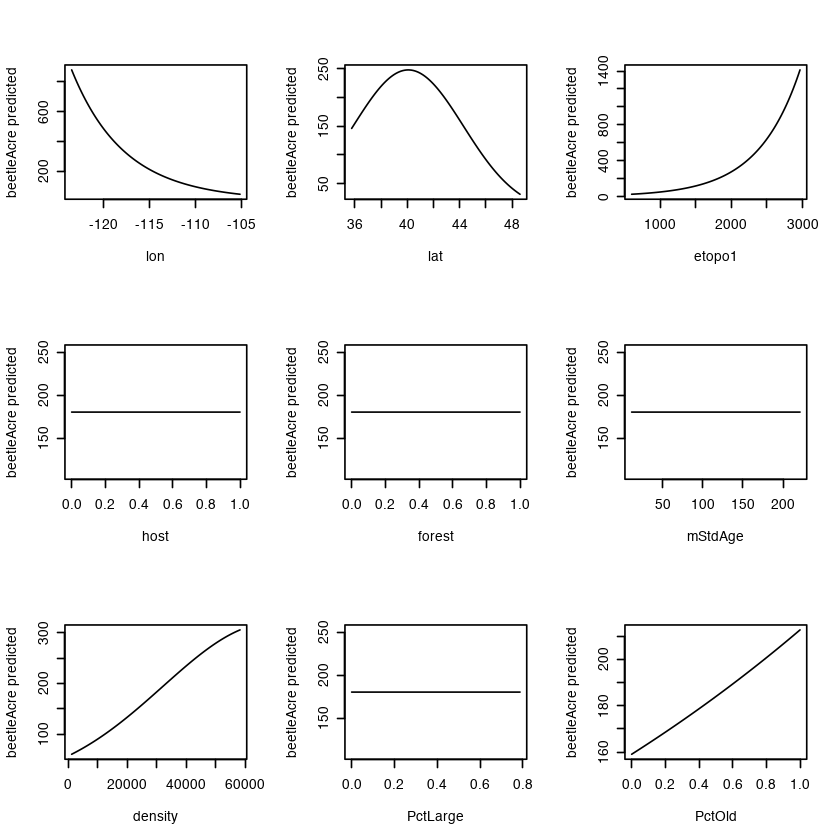

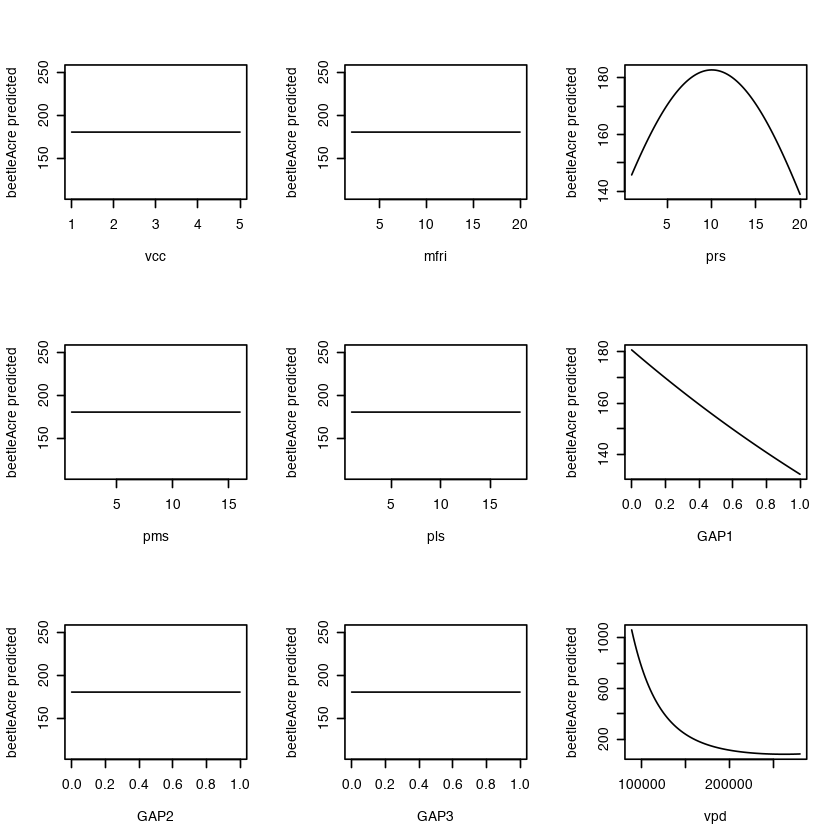

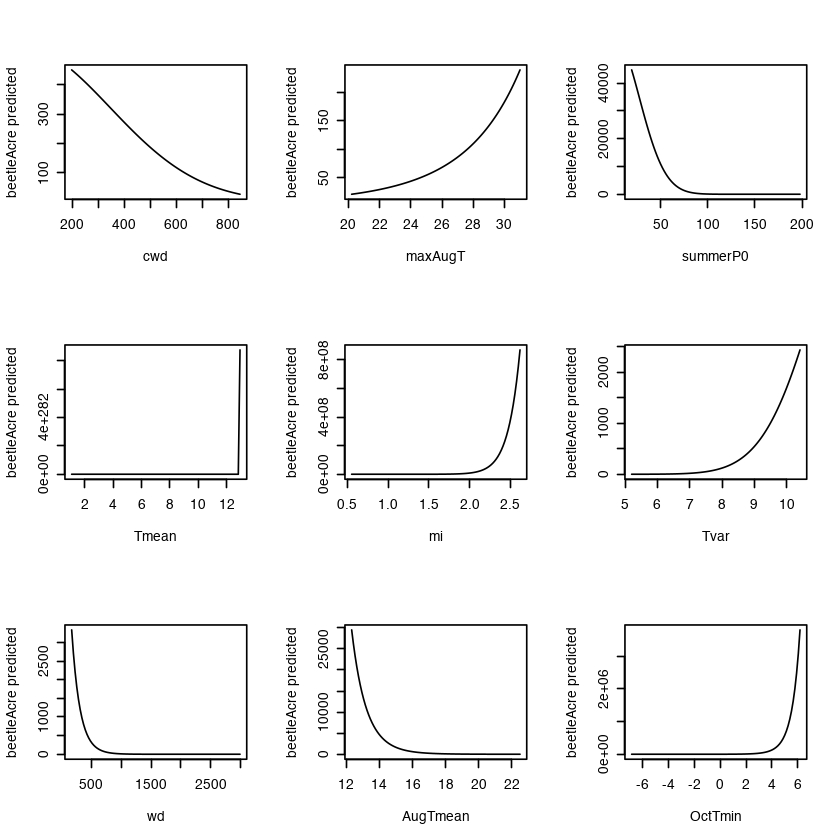

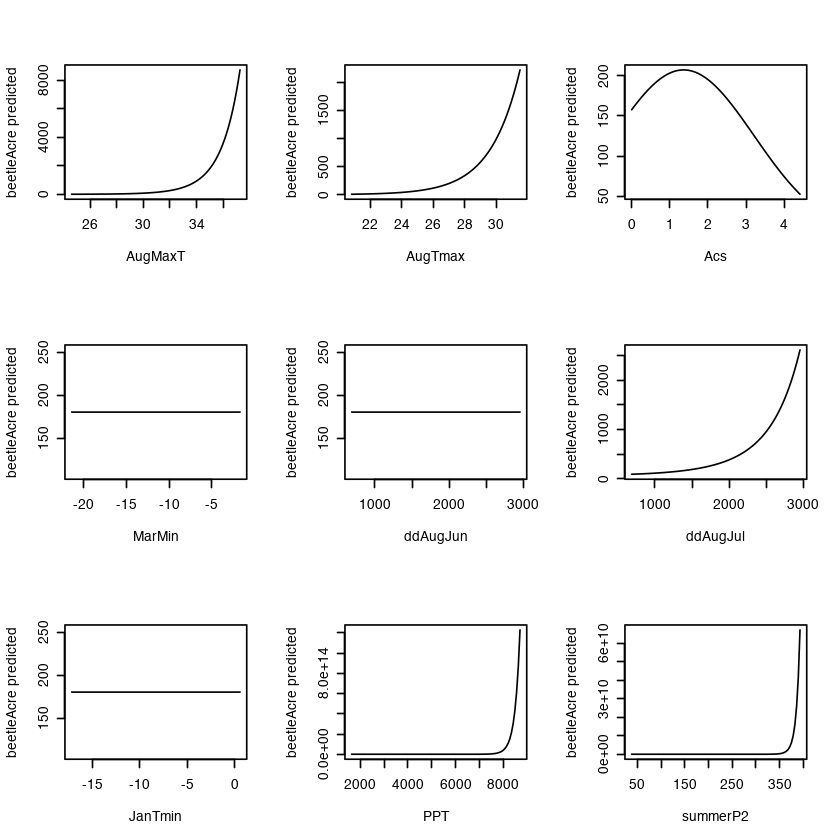

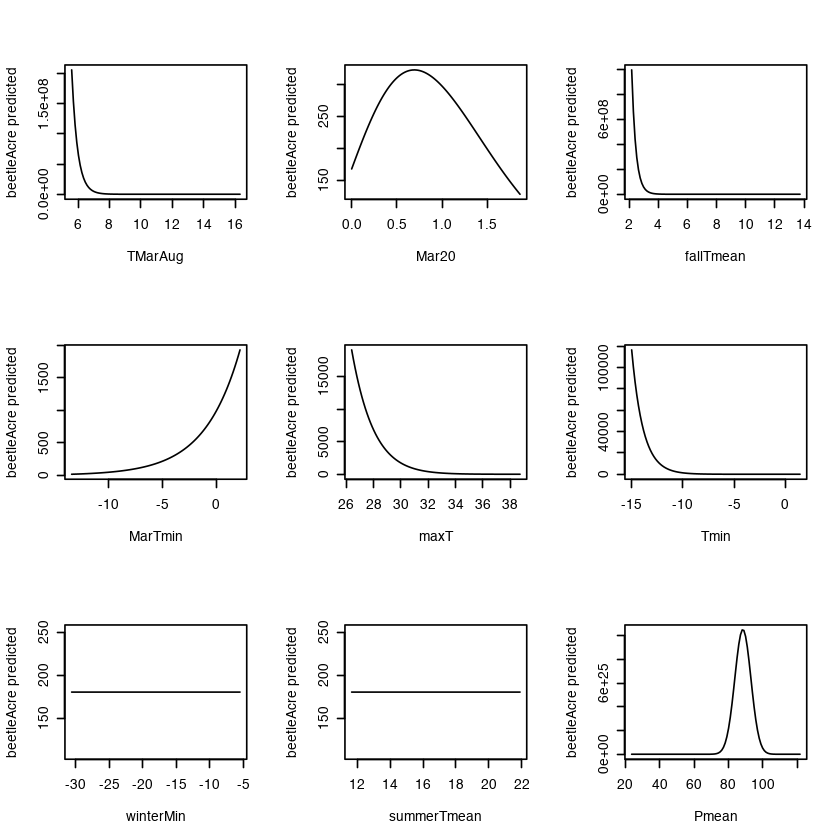

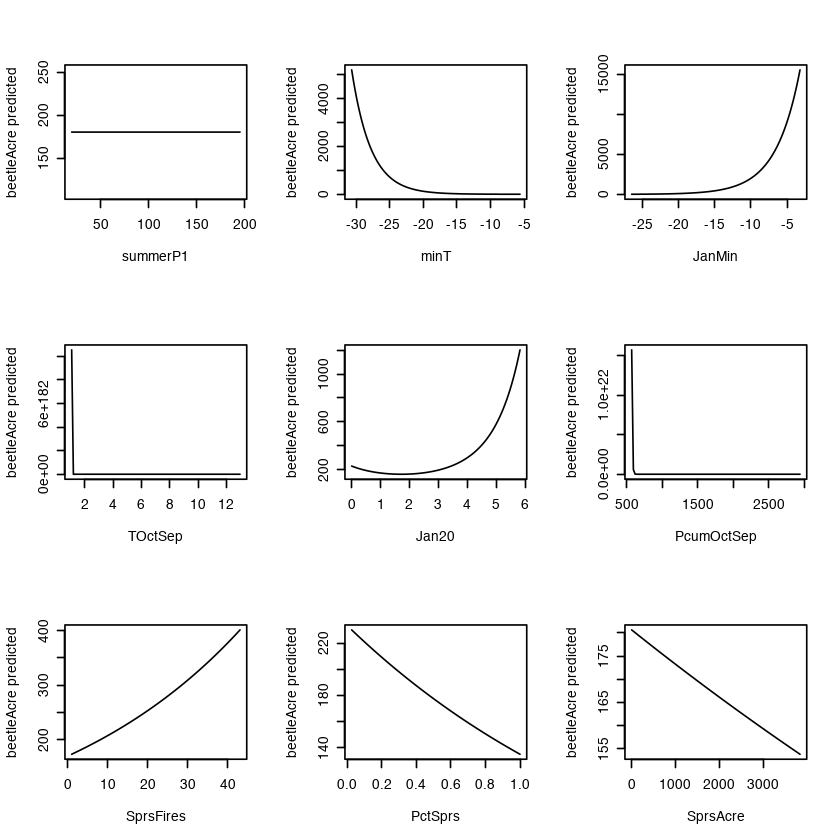

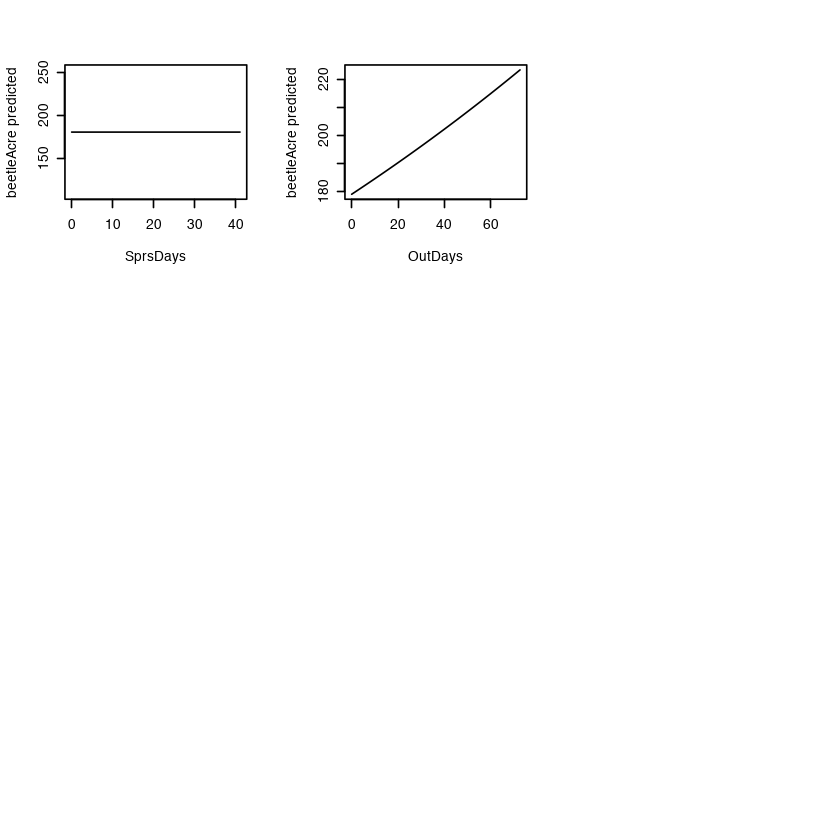

In [20]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod2.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}

In [21]:
summary(mod2.r)


Call:
lm(formula = log(beetleAcres) ~ I(lon^2) + lat + I(lat^2) + etopo1 + 
    density + I(density^2) + PctOld + prs + I(prs^2) + GAP1 + 
    vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + I(summerP0^2) + 
    Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) + 
    wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + 
    I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + I(ddAugJul^2) + 
    PPT + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    I(maxT^2) + Tmin + Pmean + I(Pmean^2) + minT + JanMin + TOctSep + 
    exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) + 
    SprsFires + PctSprs + SprsAcre + OutDays, data = data[-2188, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2596 -1.0088  0.1016  1.0961  8.0324 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -5.896e+01  1.060e+01  -5.564 2.89e-08 ***
I(lon^2)     

In [22]:
sq_terms <- c('lon', 'lat', 'density', 'prs', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean',
              'mi', 'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 
              'Acs', 'ddAugJul','summerP2', 'maxT', 'Pmean', 'Jan20', 'PcumOctSep')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean')
logp1_terms <- 'Mar20'

for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data[,varnm] <- log(data[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lon in a squared term...
Calculated lat in a squared term...
Calculated density in a squared term...
Calculated prs in a squared term...
Calculated vpd in a squared term...
Calculated cwd in a squared term...
Calculated maxAugT in a squared term...
Calculated summerP0 in a squared term...
Calculated Tmean in a squared term...
Calculated mi in a squared term...
Calculated Tvar in a squared term...
Calculated wd in a squared term...
Calculated AugTmean in a squared term...
Calculated OctTmin in a squared term...
Calculated AugMaxT in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJul in a squared term...
Calculated summerP2 in a squared term...
Calculated maxT in a squared term...
Calculated Pmean in a squared term...
Calculated Jan20 in a squared term...
Calculated PcumOctSep in a squared term...
Calculated Tmean in a exponential term...
Calculated TMarAug in a exponential term...
Calculated fallTmean in a exponential term...
Calculated Mar20 in a logar

In [23]:
selected.vars <- c('lat', 'etopo1', 'density', 'PctOld', 'prs', 'GAP1', 'vpd', 'Tmean',
                   'mi', 'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugTmax', 'Acs', 'PPT', 'TMarAug',
                   'summerP2', 'Mar20', 'fallTmean', 'MarTmin', 'Tmin', 'Pmean', 'minT','JanMin', 'TOctSep', 
                   'Jan20','PcumOctSep','SprsFires', 'PctSprs', 'SprsAcre', 'OutDays',
                   paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), paste0(logp1_terms, '_logp1'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [24]:
mod <- lm(beetleAcres ~ ., data=df)

In [25]:
mod.r <- step(mod, trace=0)

In [26]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lat + etopo1 + density + PctOld + 
    prs + GAP1 + vpd + Tmean + mi + Tvar + wd + AugTmean + OctTmin + 
    AugTmax + Acs + PPT + summerP2 + TMarAug + Mar20 + fallTmean + 
    MarTmin + Tmin + Pmean + minT + JanMin + TOctSep + Jan20 + 
    PcumOctSep + SprsFires + PctSprs + SprsAcre + OutDays + lon_sq + 
    lat_sq + density_sq + prs_sq + vpd_sq + cwd_sq + maxAugT_sq + 
    summerP0_sq + Tmean_sq + mi_sq + Tvar_sq + wd_sq + AugTmean_sq + 
    OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJul_sq + summerP2_sq + 
    maxT_sq + Pmean_sq + Jan20_sq + PcumOctSep_sq + Tmean_exp + 
    TMarAug_exp + fallTmean_exp + Mar20_logp1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3002 -1.0082  0.1087  1.0921  7.9779 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.23700    0.02985 141.935  < 2e-16 ***
lat              7.85441    1.66116   4.728 2.38e-06 ***
etopo1           1.17265    0.15365   7.632 3.16e-1

In [27]:
sort(abs(mod.r$coefficients))

OutDays        PctOld      SprsAcre          GAP1       PctSprs 
   0.05746914    0.08693596    0.09366905    0.10372393    0.21720484 
    SprsFires           prs        prs_sq    density_sq    OctTmin_sq 
   0.26629057    0.40913900    0.45635092    0.48066123    0.56296517 
          Acs   TMarAug_exp    maxAugT_sq   ddAugJul_sq         Jan20 
   0.57079102    0.58604738    0.63249721    0.68943495    0.70625094 
       cwd_sq        Acs_sq        lon_sq       density      Jan20_sq 
   0.74238671    0.79238601    0.82766434    0.84803180    1.05473363 
        wd_sq        etopo1       MarTmin fallTmean_exp      summerP2 
   1.09471074    1.17264991    1.22933374    1.33708173    1.35270383 
      AugTmax        vpd_sq         Mar20   Mar20_logp1   AugTmean_sq 
   1.47100909    1.77220975    1.79082964    1.82388858    1.88597854 
       JanMin      Tmean_sq     Tmean_exp         mi_sq    AugMaxT_sq 
   1.88994299    1.89982397    1.90194581    2.08765155    2.29402339 
         minT           vpd       maxT_sq       Tvar_sq       OctTmin 
   2.32825215    2.33469769    2.71952661    3.19356209    3.56751821 
         Tmin      AugTmean   (Intercept)          Tvar            wd 
   3.78614313    3.79889351    4.23699987    4.95415715    6.06726947 
      TMarAug            mi   summerP0_sq           lat   summerP2_sq 
   6.63859981    7.17077661    7.28988535    7.85440843    8.19618796 
       lat_sq     fallTmean           PPT         Pmean    PcumOctSep 
   8.37095527    9.17239920   10.55302859  122.39731776  135.30888659 
     Pmean_sq PcumOctSep_sq       TOctSep         Tmean 
 143.89526069  145.88155303  225.08648908  241.94250431

In [28]:
library(rcompanion)
y <- data[,'beetleAcres']
# length(y)
y.tuk <- transformTukey(y,plotit=FALSE)


    lambda      W Shapiro.p.value
402  0.025 0.9858       3.633e-16

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



In [29]:
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- (df$beetleAcres)^0.025
mod <- lm(beetleAcres ~ ., data=df)
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lat + etopo1 + density + PctOld + 
    prs + GAP1 + vpd + Tmean + mi + Tvar + wd + AugTmean + OctTmin + 
    AugTmax + Acs + PPT + summerP2 + TMarAug + Mar20 + fallTmean + 
    MarTmin + Tmin + Pmean + minT + JanMin + TOctSep + Jan20 + 
    PcumOctSep + SprsFires + PctSprs + SprsAcre + OutDays + lon_sq + 
    lat_sq + density_sq + prs_sq + vpd_sq + cwd_sq + maxAugT_sq + 
    summerP0_sq + Tmean_sq + mi_sq + Tvar_sq + wd_sq + AugTmean_sq + 
    OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJul_sq + summerP2_sq + 
    maxT_sq + Pmean_sq + Jan20_sq + PcumOctSep_sq + Tmean_exp + 
    TMarAug_exp + fallTmean_exp + Mar20_logp1, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147357 -0.027996  0.002223  0.030180  0.224401 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    1.1135257  0.0008245 1350.568  < 2e-16 ***
lat            0.2196135  0.0458802    4.787 1.79e-06 ***
etopo1         0.0330905  0.

In [30]:
sort(abs(mod.r$coefficients))

OutDays        PctOld      SprsAcre          GAP1       PctSprs 
  0.001610201   0.002480690   0.002605740   0.003065525   0.005919373 
    SprsFires           prs        prs_sq    density_sq    OctTmin_sq 
  0.007416300   0.011310931   0.012628725   0.013389854   0.015303037 
  TMarAug_exp           Acs    maxAugT_sq   ddAugJul_sq        cwd_sq 
  0.015748398   0.017238903   0.017622987   0.019726590   0.021570662 
        Jan20        Acs_sq       density        lon_sq      Jan20_sq 
  0.022031888   0.023137504   0.023660350   0.024139523   0.030918099 
        wd_sq        etopo1 fallTmean_exp       MarTmin      summerP2 
  0.031090808   0.033090528   0.035836382   0.036050447   0.036713724 
      AugTmax   AugTmean_sq      Tmean_sq        vpd_sq     Tmean_exp 
  0.043121135   0.048863282   0.050030169   0.050105097   0.050908423 
        Mar20        JanMin   Mar20_logp1         mi_sq    AugMaxT_sq 
  0.051274276   0.052611152   0.052745270   0.058765061   0.061802386 
          vpd          minT       maxT_sq       Tvar_sq       OctTmin 
  0.065579531   0.065812073   0.073837938   0.086924415   0.101108070 
     AugTmean          Tmin          Tvar            wd       TMarAug 
  0.104913429   0.105263157   0.136888845   0.170490095   0.184573155 
  summerP0_sq            mi           lat   summerP2_sq        lat_sq 
  0.200804585   0.201302041   0.219613530   0.225630697   0.235980410 
    fallTmean           PPT   (Intercept)         Pmean    PcumOctSep 
  0.256997072   0.299677063   1.113525666   3.456059565   3.821704991 
     Pmean_sq PcumOctSep_sq       TOctSep         Tmean 
  4.021175529   4.076703431   6.317905298   6.783873088

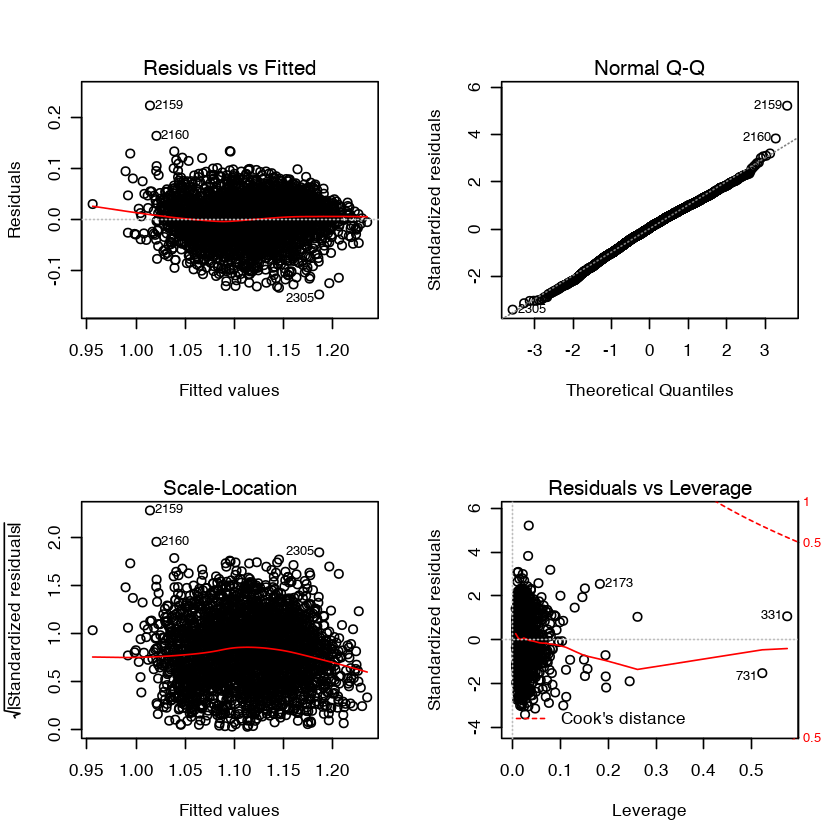

In [31]:
par(mfrow=c(2, 2))
plot(mod.r)

In [32]:
length(data$beetleAcres)

[1] 2818

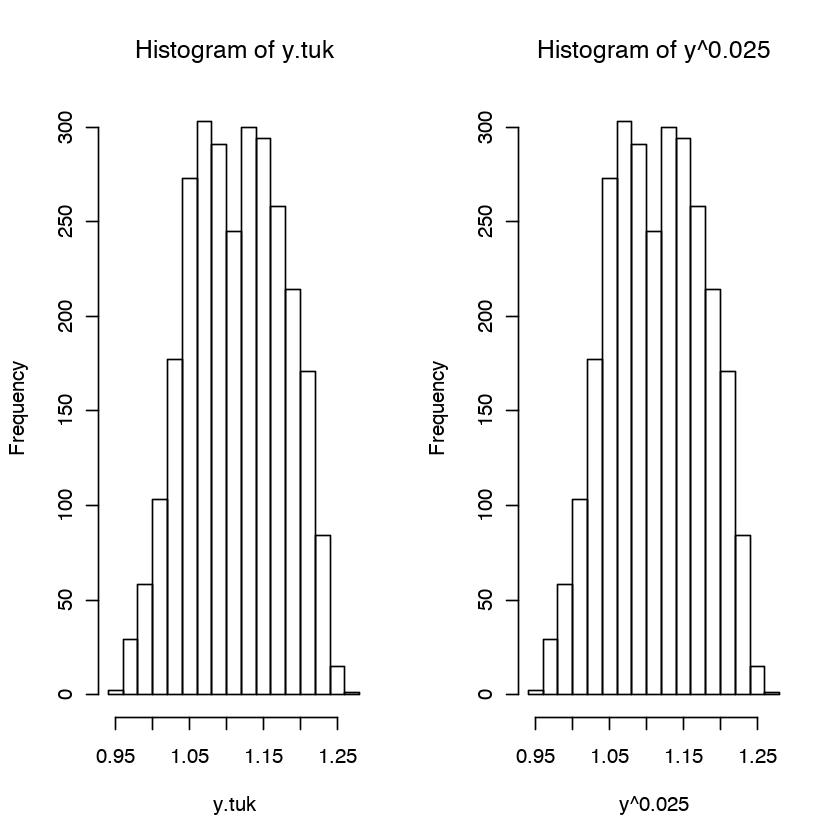

In [33]:
par(mfrow=c(1, 2))
hist(y.tuk)
hist(y ^ 0.025)

In [34]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 1000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    beetleAcres^0.025 ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
 81.654   2.568  98.478 

In [35]:
bstar <- as.data.frame(bstar)

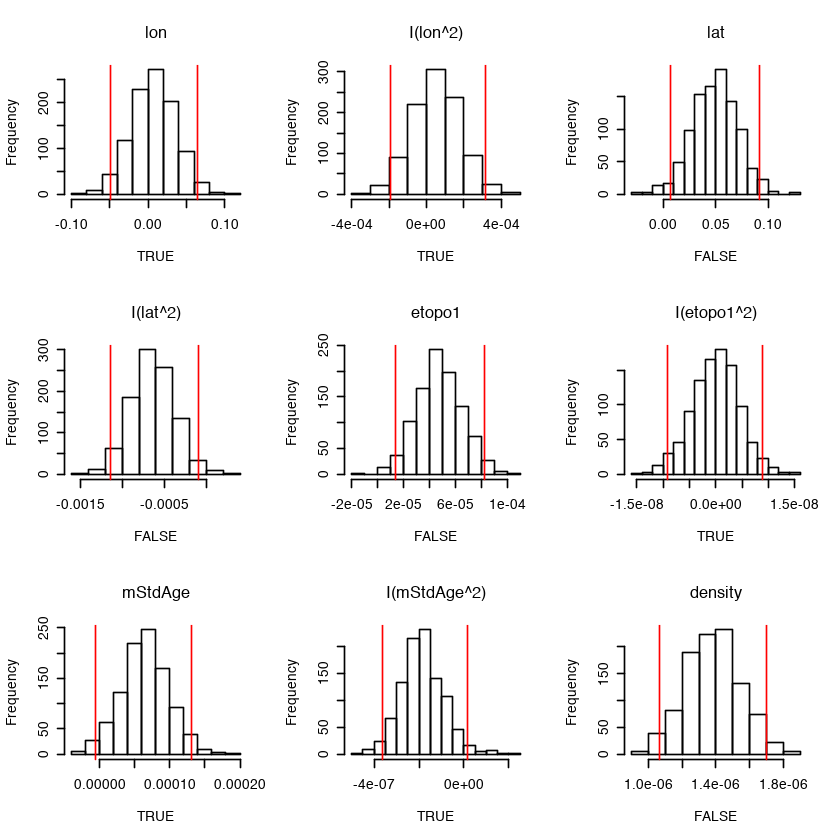

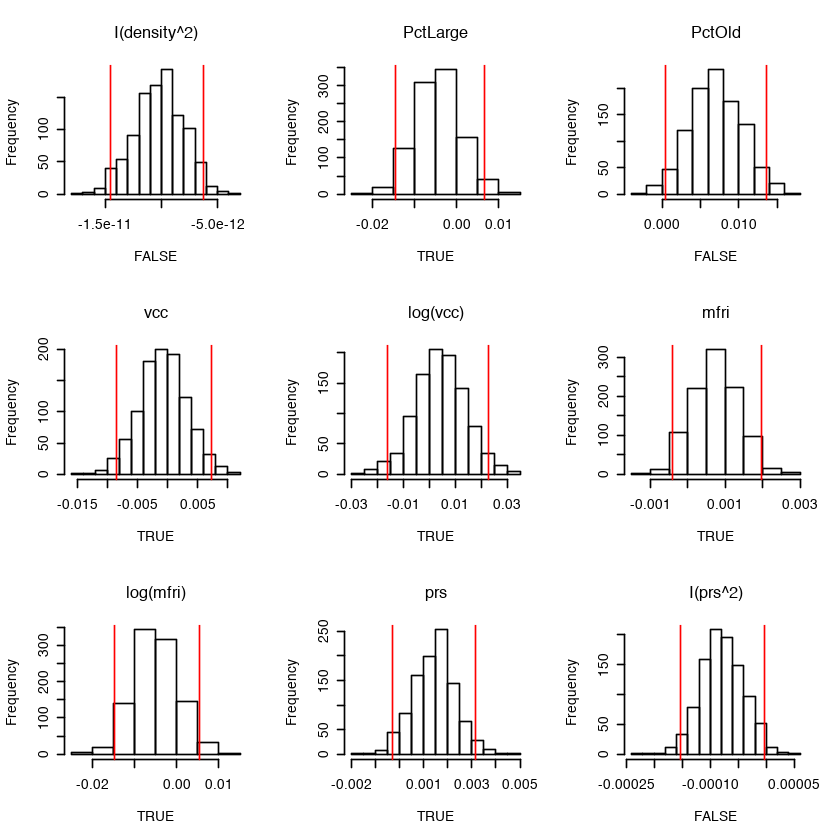

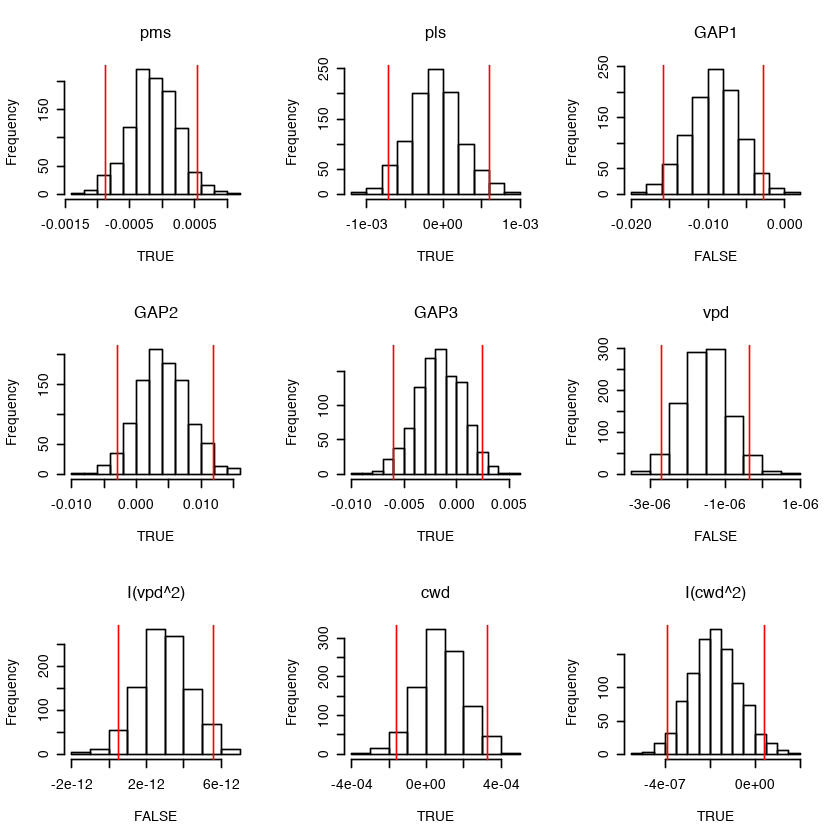

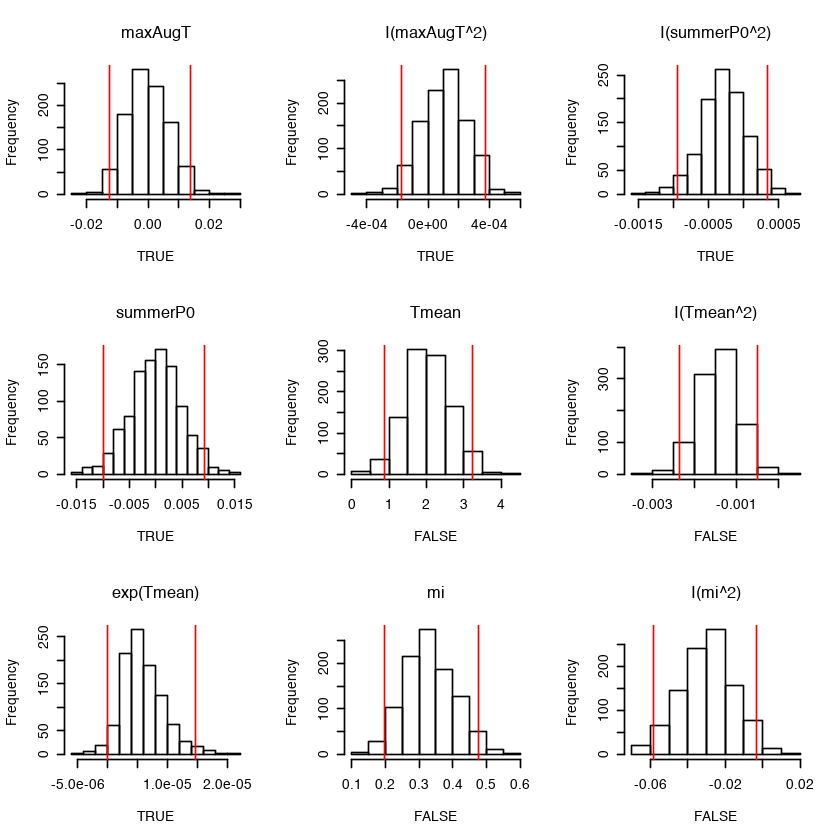

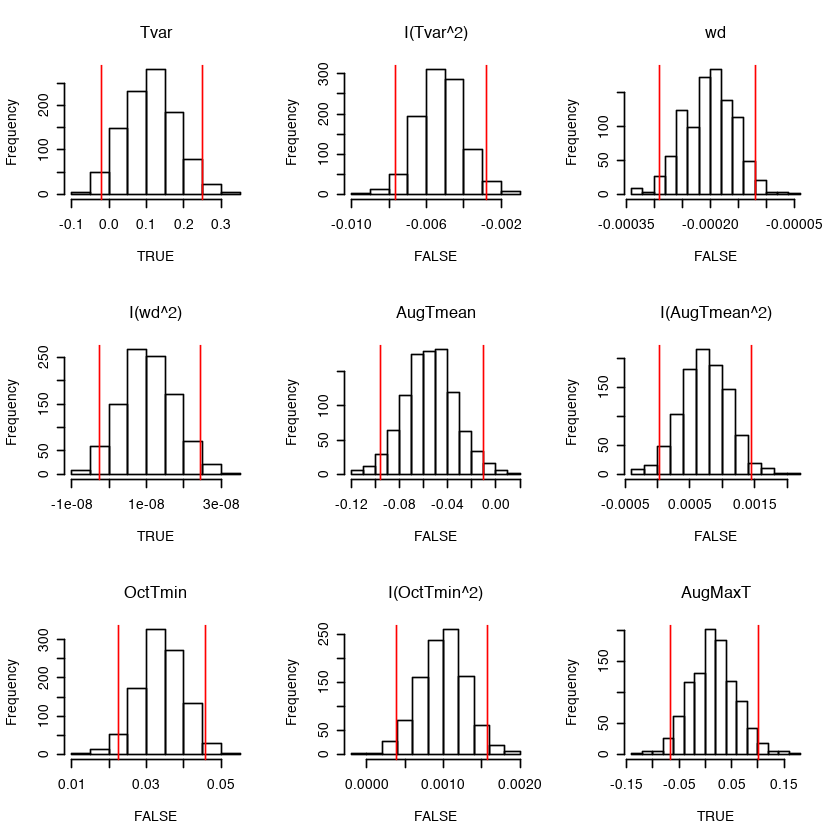

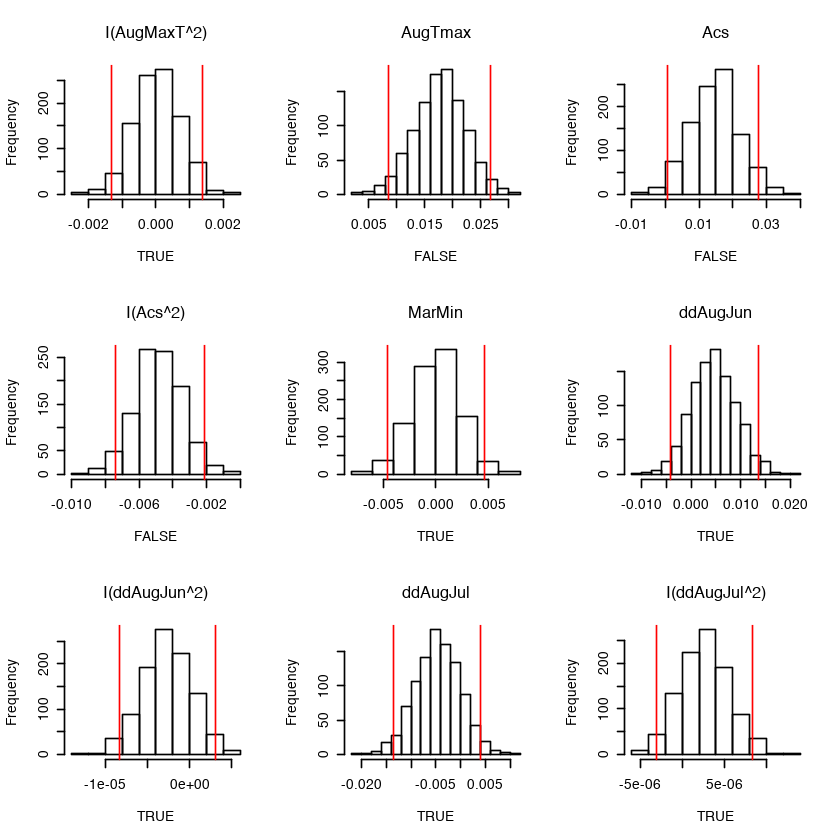

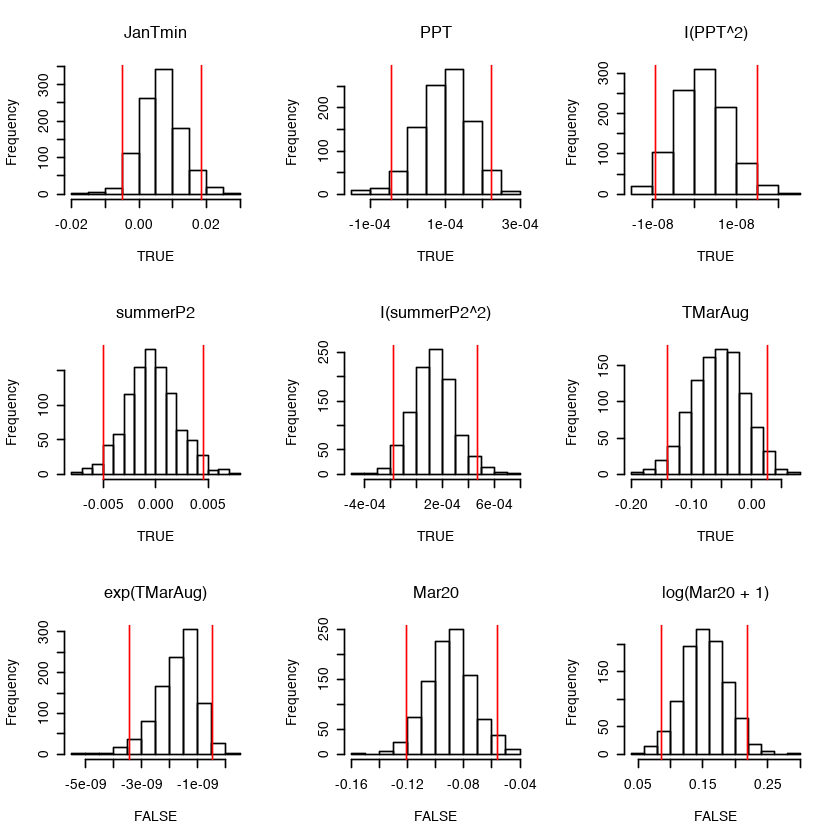

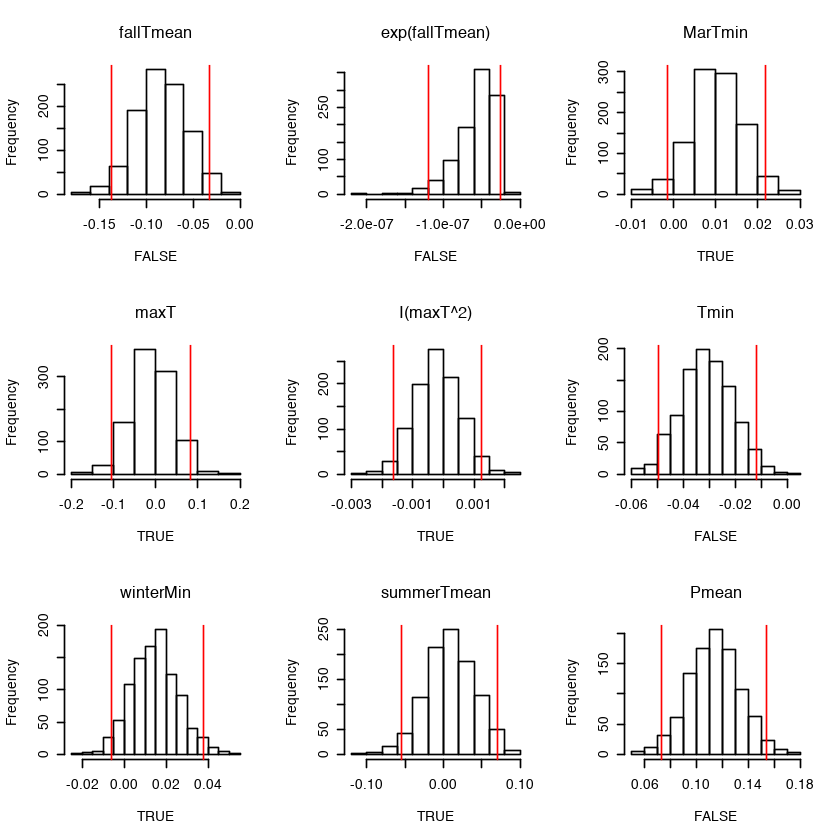

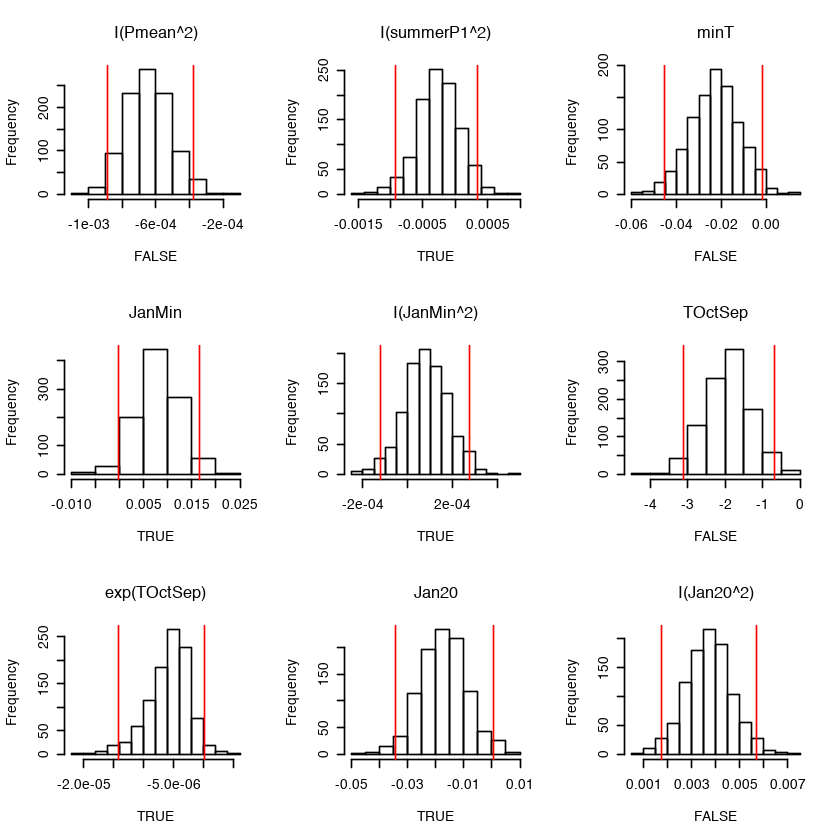

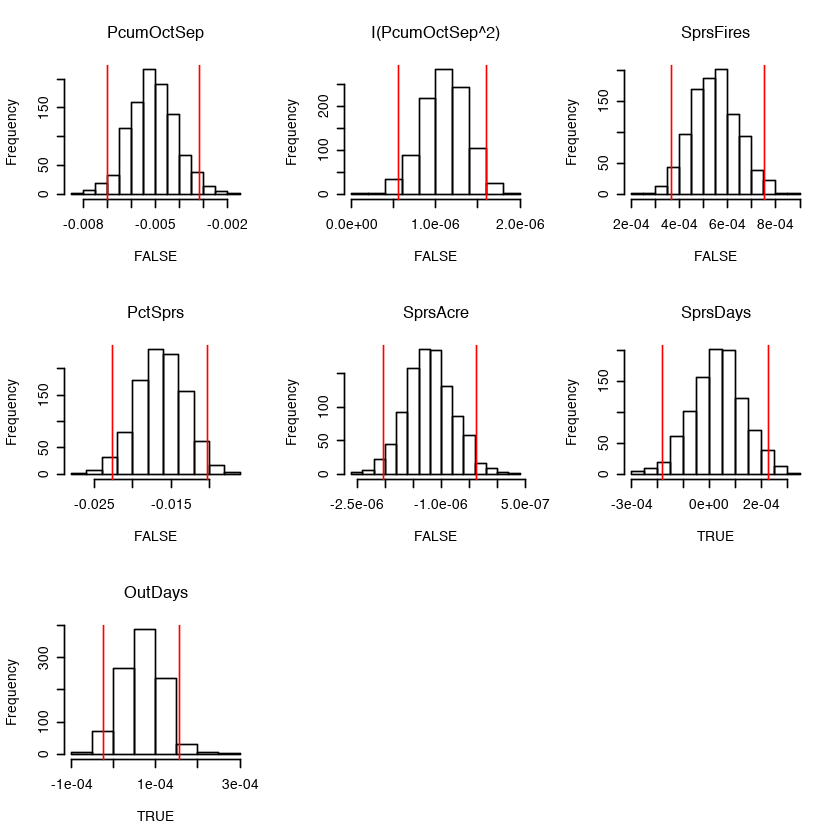

In [46]:
par(mfrow=c(3, 3))
removable <- c()
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        remove <- 0 >= qs[1] & 0 <= qs[2]
        hist(bstar[,field], main=field, xlab=remove)
        abline(v=qs[1],col="red")
        abline(v=qs[2],col="red")
        if(remove){removable <- c(removable, field)}
    }
}

In [57]:
colnames(bstar)

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "PctLarge"       
[13] "PctOld"          "vcc"             "log(vcc)"        "mfri"           
[17] "log(mfri)"       "prs"             "I(prs^2)"        "pms"            
[21] "pls"             "GAP1"            "GAP2"            "GAP3"           
[25] "vpd"             "I(vpd^2)"        "cwd"             "I(cwd^2)"       
[29] "maxAugT"         "I(maxAugT^2)"    "I(summerP0^2)"   "summerP0"       
[33] "Tmean"           "I(Tmean^2)"      "exp(Tmean)"      "mi"             
[37] "I(mi^2)"         "Tvar"            "I(Tvar^2)"       "wd"             
[41] "I(wd^2)"         "AugTmean"        "I(AugTmean^2)"   "OctTmin"        
[45] "I(OctTmin^2)"    "AugMaxT"         "I(AugMaxT^2)"    "AugTmax"        
[49] "Acs"             "I(Acs^2)"        "MarMin"          "ddAugJun"       
[53] "I(ddAugJun^2)"   "ddAugJul"        "I(ddAugJul^2)"   "JanTmin"        
[57] "PPT"             "I(PPT^2)"        "summerP2"        "I(summerP2^2)"  
[61] "TMarAug"         "exp(TMarAug)"    "Mar20"           "log(Mar20 + 1)" 
[65] "fallTmean"       "exp(fallTmean)"  "MarTmin"         "maxT"           
[69] "I(maxT^2)"       "Tmin"            "winterMin"       "summerTmean"    
[73] "Pmean"           "I(Pmean^2)"      "summerP1"        "I(summerP1^2)"  
[77] "minT"            "JanMin"          "I(JanMin^2)"     "TOctSep"        
[81] "exp(TOctSep)"    "Jan20"           "I(Jan20^2)"      "PcumOctSep"     
[85] "I(PcumOctSep^2)" "SprsFires"       "PctSprs"         "SprsAcre"       
[89] "SprsDays"        "OutDays"

In [45]:
removable

[1] "lon"           "I(lon^2)"      "I(etopo1^2)"   "mStdAge"      
 [5] "I(mStdAge^2)"  "PctLarge"      "vcc"           "log(vcc)"     
 [9] "mfri"          "log(mfri)"     "prs"           "pms"          
[13] "pls"           "GAP2"          "GAP3"          "cwd"          
[17] "I(cwd^2)"      "maxAugT"       "I(maxAugT^2)"  "I(summerP0^2)"
[21] "summerP0"      "exp(Tmean)"    "Tvar"          "I(wd^2)"      
[25] "AugMaxT"       "I(AugMaxT^2)"  "MarMin"        "ddAugJun"     
[29] "I(ddAugJun^2)" "ddAugJul"      "I(ddAugJul^2)" "JanTmin"      
[33] "PPT"           "I(PPT^2)"      "summerP2"      "I(summerP2^2)"
[37] "TMarAug"       "MarTmin"       "maxT"          "I(maxT^2)"    
[41] "winterMin"     "summerTmean"   "I(summerP1^2)" "JanMin"       
[45] "I(JanMin^2)"   "exp(TOctSep)"  "Jan20"         "SprsDays"     
[49] "OutDays"

mod <- lm(
    beetleAcres^0.025 ~ lat + I(lat^2) + etopo1 + density + I(density^2) + PctOld + I(prs^2) 
    + GAP1 + vpd + I(vpd^2) + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + I(Tvar^2) 
    + wd + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugTmax + Acs + I(Acs^2) 
    + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + Tmin + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + SprsFires + PctSprs + SprsAcre + OutDays,
    data=data)

In [37]:
mod <- lm(
    beetleAcres^0.025 ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=data)

In [38]:
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres^0.025 ~ I(lon^2) + lat + I(lat^2) + 
    etopo1 + mStdAge + I(mStdAge^2) + density + I(density^2) + 
    PctOld + prs + I(prs^2) + GAP1 + vpd + I(vpd^2) + I(cwd^2) + 
    I(maxAugT^2) + I(summerP0^2) + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    I(AugTmean^2) + OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + 
    Acs + I(Acs^2) + I(ddAugJul^2) + PPT + summerP2 + I(summerP2^2) + 
    TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + 
    exp(fallTmean) + MarTmin + I(maxT^2) + Tmin + winterMin + 
    Pmean + I(Pmean^2) + minT + JanMin + TOctSep + exp(TOctSep) + 
    Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) + SprsFires + 
    PctSprs + SprsAcre + OutDays, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146215 -0.027977  0.002247  0.030101  0.226201 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -7.481e

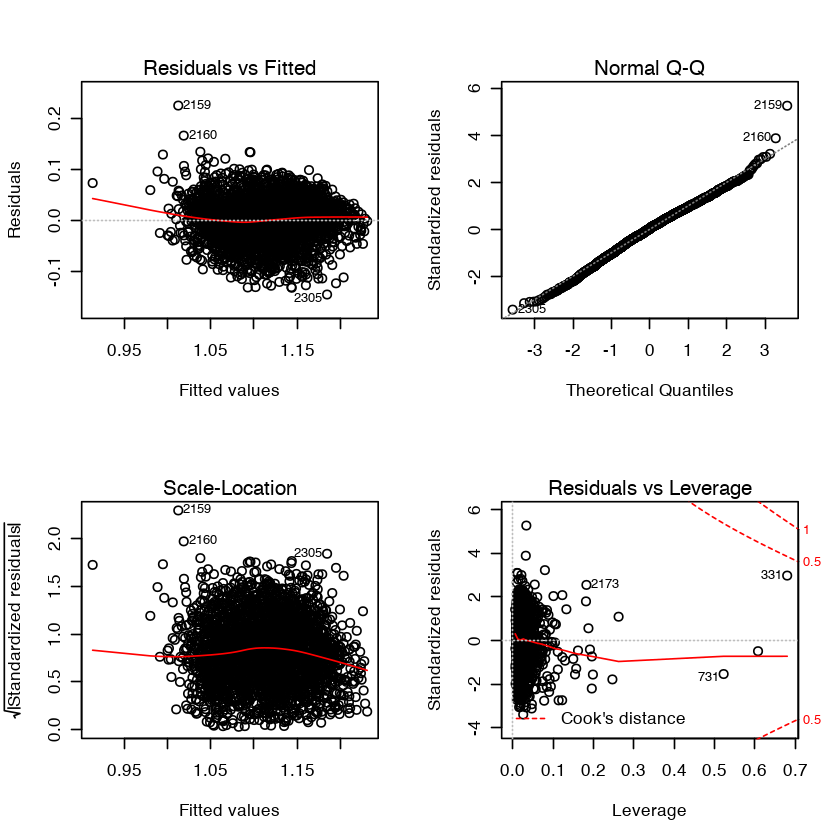

In [39]:
par(mfrow=c(2, 2))
plot(mod.r)

In [40]:
sort(abs(mod.r$coefficients))

I(vpd^2)    I(density^2)    exp(TMarAug)         I(wd^2)   I(ddAugJul^2) 
   2.414169e-12    1.001010e-11    1.297302e-09    9.863395e-09    1.192608e-08 
 exp(fallTmean)        I(cwd^2)    I(mStdAge^2) I(PcumOctSep^2)        SprsAcre 
   4.151863e-08    1.205647e-07    1.596935e-07    1.135720e-06    1.157269e-06 
            vpd         density    exp(TOctSep)      exp(Tmean)   I(summerP2^2) 
   1.244583e-06    1.387260e-06    4.818002e-06    4.994165e-06    5.074521e-06 
  I(summerP0^2)        I(lon^2)          etopo1         mStdAge        I(prs^2) 
   1.792386e-05    2.112260e-05    4.809244e-05    5.797118e-05    7.389250e-05 
        OutDays    I(maxAugT^2)             PPT              wd    I(AugMaxT^2) 
   8.513501e-05    1.248044e-04    1.291589e-04    2.062885e-04    2.531582e-04 
      I(maxT^2)        summerP2       SprsFires   I(AugTmean^2)      I(Pmean^2) 
   3.182103e-04    3.653229e-04    5.493858e-04    5.609220e-04    6.509272e-04 
       I(lat^2)    I(OctTmin^2)      I(Tmean^2)             prs      I(Jan20^2) 
   8.393097e-04    9.805424e-04    1.226077e-03    1.479469e-03    3.419844e-03 
       I(Acs^2)       I(Tvar^2)      PcumOctSep          PctOld          JanMin 
   4.164879e-03    4.743765e-03    5.218106e-03    7.079765e-03    7.684681e-03 
        MarTmin            GAP1             Acs           Jan20       winterMin 
   9.150291e-03    9.296692e-03    1.204742e-02    1.280179e-02    1.410102e-02 
        PctSprs         AugTmax            minT            Tmin         I(mi^2) 
   1.488828e-02    1.715455e-02    2.356043e-02    2.474761e-02    2.903194e-02 
        OctTmin        AugTmean             lat         TMarAug           Mar20 
   3.465169e-02    4.453162e-02    6.660614e-02    7.206853e-02    9.380059e-02 
      fallTmean           Pmean            Tvar  log(Mar20 + 1)              mi 
   9.790961e-02    1.147495e-01    1.193585e-01    1.586347e-01    3.426274e-01 
    (Intercept)         TOctSep           Tmean 
   7.480572e-01    2.202879e+00    2.375328e+00